# Import libraries

In [ ]:
install.packages(c("readxl","zoo","imputeTS", "splines", "aTSA", "readxl", "TTR", "tseries", "forecast", "ggplot2", "seasonal",  "xgboost", "data.table", "lubridate","VIM", "dplyr", "e1071", "randomForest"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”
also installing the dependencies ‘rbibutils’, ‘litedown’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘markdown’, ‘png’, ‘jpeg’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘gridtext’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘RcppEigen’, ‘ggtext’, ‘stinepack’, ‘xts’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’, ‘x13binary’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘laeken’, ‘ranger’, ‘proxy’




In [ ]:
library("readxl")
library("zoo")
library("imputeTS")
library("splines")
library("aTSA")
library("readxl")
library("TTR")
library("tseries")
library("forecast")
library("imputeTS")
library("ggplot2")
library("seasonal")
library("zoo")
library("lubridate")
library("xgboost")
library("data.table")
library("VIM")
library("dplyr")
library("e1071")
library("randomForest")


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘imputeTS’


The following object is masked from ‘package:zoo’:

    na.locf



Attaching package: ‘aTSA’


The following object is masked from ‘package:graphics’:

    identify



Attaching package: ‘tseries’


The following objects are masked from ‘package:aTSA’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:imputeTS’:

    na.remove



Attaching package: ‘forecast’


The following object is masked from ‘package:aTSA’:

    forecast



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,


## Read files

In [ ]:
missed = read_xlsx('/content/DATA TOPIC 5.xlsx', sheet='MISSING DATA')
missed

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`


Sales_VND,...2,...3,...4
<dbl>,<lgl>,<dbl>,<chr>
163973105,NA,NA,NA
173165814,NA,NA,NA
114787131,NA,NA,Bắt đầu từ 05/2017
138039987,NA,NA,NA
157056527,NA,NA,NA
217376740,NA,13,NA
NA,NA,NA,NA
193532161,NA,NA,NA
152296746,NA,NA,NA


In [ ]:
missed <- missed[,1]
missed

Sales_VND
<dbl>
163973105
173165814
114787131
138039987
157056527
217376740
NA
193532161
152296746


In [ ]:
data = read_xlsx('/content/DATA TOPIC 5.xlsx', sheet='GỐC')
data

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`


Sales_VND,...2,...3,...4
<dbl>,<lgl>,<lgl>,<chr>
163973105,NA,NA,NA
173165814,NA,NA,NA
114787131,NA,NA,Bắt đầu từ 05/2017
138039987,NA,NA,NA
157056527,NA,NA,NA
217376740,NA,NA,NA
217714999,NA,NA,NA
193532161,NA,NA,NA
152296746,NA,NA,NA


In [ ]:
data <- data[,1]

In [ ]:
# Split the data into training and actual (test) sets
train_data <- data[1:(nrow(data) - 6),, drop = FALSE]
actual_data <- data[(nrow(data) - 5):nrow(data),, drop = FALSE]

# Display the dimensions of the new dataframes to verify the split
print("Training data dimensions:")
print(dim(train_data))
print("Actual data dimensions:")
print(dim(actual_data))

[1] "Training data dimensions:"
[1] 94  1
[1] "Actual data dimensions:"
[1] 6 1


# Handle missing values

In [ ]:
# detect NA in missed
sum(is.na(missed))

[1] 13

In [ ]:
# show index of NA values
which(is.na(missed))

[1]  7 14 20 27 32 40 46 55 61 68 76 83 89

In [ ]:
# calculate percentage of NA values
percentage_na = (sum(is.na(missed$Sales_VND)) / length(missed$Sales_VND)) * 100
percentage_na

[1] 13.82979

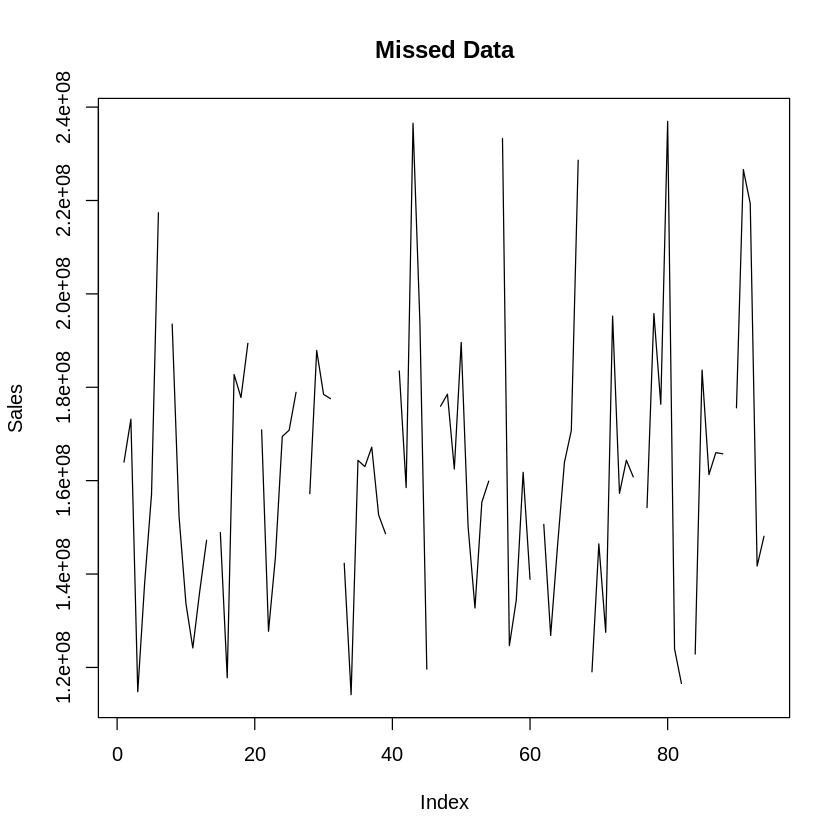

In [ ]:
# Plot the missed data
plot(missed$Sales_VND, main = "Missed Data", ylab = "Sales", type = "l")

## LI

In [ ]:
# Create a vector with missing values
# Use the approx function to interpolate linearly
li <- approx(1:length(missed$Sales_VND), missed$Sales_VND, xout = 1:length(missed$Sales_VND))$y
# Print the interpolated result
print(li)

 [1] 163973105 173165814 114787131 138039987 157056527 217376740 205454450
 [8] 193532161 152296746 133674237 124166931 136256232 147232309 148057210
[15] 148882111 117791593 182726790 177795964 189413291 180136598 170859905
[22] 127741101 143537348 169468024 170818701 178913503 168060170 157206836
[29] 187890311 178476061 177560650 159929944 142299238 114165141 164350495
[36] 163000398 167180216 152641116 148663618 166076448 183489277 158521440
[43] 236543273 193805584 119640146 147793326 175946506 178524964 162485259
[50] 189591410 150179576 132728535 155402246 159899585 196590884 233282184
[57] 124647518 134395677 161786302 138869705 144752728 150635752 126844650
[64] 146076748 163923086 170728049 228632471 173846373 119060275 146452905
[71] 127517393 195243572 157274728 164378781 160810477 157519468 154228460
[78] 195791968 176357810 236956479 123977429 116573247 119718704 122864160
[85] 183677717 161295647 165998742 165759642 170678942 175598243 226612347
[92] 219346881 141712993 

In [ ]:
# Create a dataframe to compare original, NA indices, and LI values
comparison_df_li <- data.frame(
  NA_Index = which(is.na(missed$Sales_VND)),
  Original_Value = train_data$Sales_VND[which(is.na(missed$Sales_VND))],
  LI_Value = li[which(is.na(missed$Sales_VND))]
)

# Print the comparison dataframe
print(comparison_df_li)

   NA_Index Original_Value  LI_Value
1         7      217714999 205454450
2        14      159082130 148057210
3        20      194080626 180136598
4        27      149643840 168060170
5        32      178469488 159929944
6        40      170058701 166076448
7        46      166535957 147793326
8        55      219532923 196590884
9        61      197377470 144752728
10       68      212994835 173846373
11       76      149879518 157519468
12       83      155649591 119718704
13       89      194527341 170678942


In [ ]:
# Calculate RMSE for Linear Interpolation
rmse_li <- sqrt(mean((train_data$Sales_VND[which(is.na(missed))] - li[which(is.na(missed))])^2))

# Print the RMSE
print(paste("RMSE for Linear Interpolation:", rmse_li))

[1] "RMSE for Linear Interpolation: 25211066.7515289"


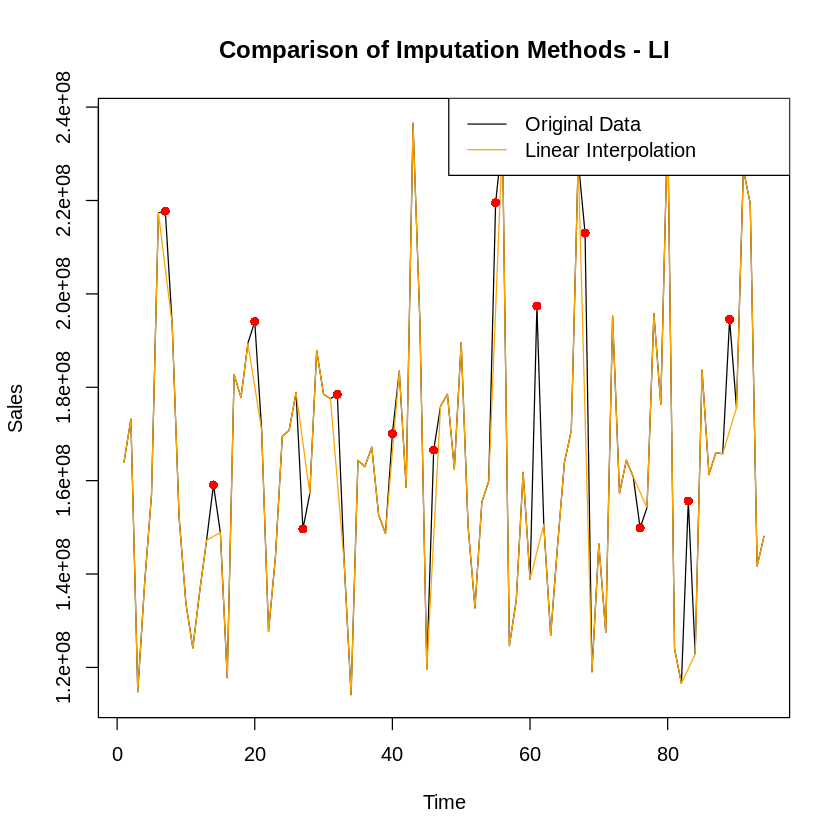

In [ ]:
# Get the indices of missing values
missing_indices <- which(is.na(missed))

# Create a plot of the original data
plot(train_data$Sales_VND, type = "l", col = "black", main = "Comparison of Imputation Methods - LI", ylab = "Sales", xlab = "Time",
     ylim = range(c(train_data$Sales_VND, li), na.rm = TRUE))

# Add lines for each imputation method (excluding SVM)
lines(li, type = "l", col = "orange") # Linear Interpolation

# Add a legend (excluding SVM)
legend("topright", legend = c("Original Data", "Linear Interpolation"), # Updated legend
       col = c("black", "orange"), lty = 1) # Updated colors

# Highlight the original missing points
points((1:length(train_data$Sales_VND))[missing_indices], train_data$Sales_VND[missing_indices], col = "red", pch = 16)

## KNNI

In [ ]:
# define rmse function
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))}

In [ ]:
# Simple manual approach for single column
knn_impute_single <- function(x, k = 3) {
  na_positions <- which(is.na(x))

  for (pos in na_positions) {
    # Calculate distances to all non-NA values
    distances <- abs((1:length(x)) - pos)
    distances[is.na(x)] <- Inf  # Ignore other NA values

    # Find k nearest neighbors
    nearest_indices <- order(distances)[1:k]
    nearest_values <- x[nearest_indices]

    # Impute with mean of nearest neighbors (or median)
    x[pos] <- mean(nearest_values, na.rm = TRUE)
  }
  return(x)
}

In [ ]:
# Apply to the 'Sales_VND' column of the data frame
data_imputed_vector <- knn_impute_single(missed$Sales_VND, k = 5)

# Convert the imputed vector back to a data frame for consistency with previous outputs
data_imputed <- data.frame(Sales_VND = data_imputed_vector)

# Display data after applying KNNI
print("Data after applying KNNI:")
print(data_imputed)

[1] "Data after applying KNNI:"
   Sales_VND
1  163973105
2  173165814
3  114787131
4  138039987
5  157056527
6  217376740
7  171660432
8  193532161
9  152296746
10 133674237
11 124166931
12 136256232
13 147232309
14 134865835
15 148882111
16 117791593
17 182726790
18 177795964
19 189413291
20 169707410
21 170859905
22 127741101
23 143537348
24 169468024
25 170818701
26 178913503
27 172859475
28 157206836
29 187890311
30 178476061
31 177560650
32 160078280
33 142299238
34 114165141
35 164350495
36 163000398
37 167180216
38 152641116
39 148663618
40 162099133
41 183489277
42 158521440
43 236543273
44 193805584
45 119640146
46 180892095
47 175946506
48 178524964
49 162485259
50 189591410
51 150179576
52 132728535
53 155402246
54 159899585
55 161192014
56 233282184
57 124647518
58 134395677
59 161786302
60 138869705
61 142506417
62 150635752
63 126844650
64 146076748
65 163923086
66 170728049
67 228632471
68 165759357
69 119060275
70 146452905
71 127517393
72 195243572
73 157274728
74 164

In [ ]:
# Create a dataframe to compare original, NA indices, and LI values
comparison_df_knni <- data.frame(
  NA_Index = which(is.na(missed$Sales_VND)),
  Original_Value = train_data$Sales_VND[which(is.na(missed$Sales_VND))],
  KNNI_Value = data_imputed$Sales_VND[which(is.na(missed$Sales_VND))]
)

# Print the comparison dataframe
print(comparison_df_knni)

   NA_Index Original_Value KNNI_Value
1         7      217714999  171660432
2        14      159082130  134865835
3        20      194080626  169707410
4        27      149643840  172859475
5        32      178469488  160078280
6        40      170058701  162099133
7        46      166535957  180892095
8        55      219532923  161192014
9        61      197377470  142506417
10       68      212994835  165759357
11       76      149879518  166496883
12       83      155649591  156809806
13       89      194527341  179052924


In [ ]:
# Calculate RMSE for Linear Interpolation
rmse_knni <- sqrt(mean((train_data$Sales_VND[which(is.na(missed))] - data_imputed$Sales_VND[which(is.na(missed))])^2))

# Print the RMSE
print(paste("RMSE for KNN Imputation:", rmse_knni))

[1] "RMSE for KNN Imputation: 32357125.4040081"


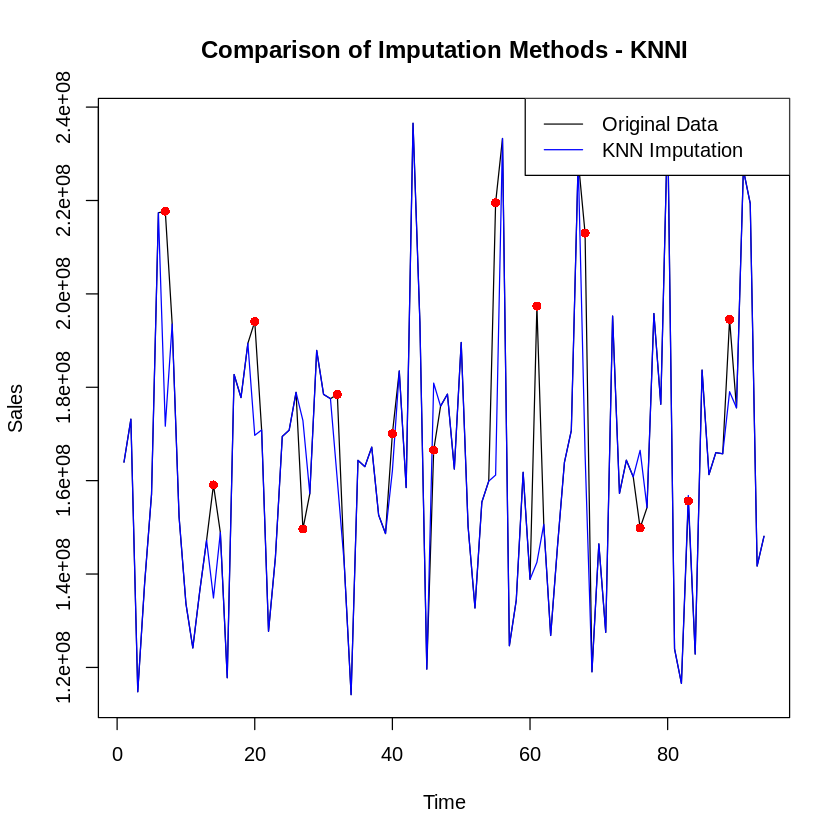

In [ ]:
# Create a plot of the original data
plot(train_data$Sales_VND, type = "l", col = "black", main = "Comparison of Imputation Methods - KNNI", ylab = "Sales", xlab = "Time",
     ylim = range(c(train_data$Sales_VND, data_imputed$Sales_VND), na.rm = TRUE))

# Add lines for each imputation method
lines(data_imputed$Sales_VND, type = "l", col = "blue")

# Add a legend
legend("topright", legend = c("Original Data", "KNN Imputation"), # Updated legend
       col = c("black", "blue"), lty = 1) # Updated colors

# Highlight the original missing points
points((1:length(train_data$Sales_VND))[missing_indices], train_data$Sales_VND[missing_indices], col = "red", pch = 16)

## SVMI

In [ ]:
# Create a copy of the missed data frame for SVMI
missed_df_svmi <- missed

# Add a datetime column starting from 2017-05-01 with monthly intervals
missed_df_svmi$datetime <- seq(from = as.Date("2017-05-01"), by = "month", length.out = nrow(missed_df_svmi))

# Convert the datetime column to numeric (e.g., number of days since the start)
missed_df_svmi$datetime_numeric <- as.numeric(missed_df_svmi$datetime)

# Display the dataframe with the new columns
print(head(missed_df_svmi))

# A tibble: 6 × 3
  Sales_VND datetime   datetime_numeric
      <dbl> <date>                <dbl>
1 163973105 2017-05-01            17287
2 173165814 2017-06-01            17318
3 114787131 2017-07-01            17348
4 138039987 2017-08-01            17379
5 157056527 2017-09-01            17410
6 217376740 2017-10-01            17440


In [ ]:
# Prepare the data for SVMI
# The SVMI function often expects a matrix or data frame with numeric columns.
# The 'Sales_VND' and 'datetime_numeric' columns can be used.
# Reorder columns to have the dependent variable ('Sales_VND') first for the svm function
svmi_data <- missed_df_svmi[, c("Sales_VND", "datetime_numeric")]
missed$datetime <- seq(from = as.Date("2017-05-01"), by = "month", length.out = nrow(missed_df_svmi))

# Convert the datetime column to numeric (e.g., number of days since the start)
missed_df_svmi$datetime_numeric <- as.numeric(missed_df_svmi$datetime)

# Display the dataframe with the new columns
print(head(missed_df_svmi))

# Prepare the data for SVMI
# The SVMI function often expects a matrix or data frame with numeric columns.
# The 'Sales_VND' and 'datetime_numeric' columns can be used.
# Reorder columns to have the dependent variable ('Sales_VND') first for the svm function
svmi_data <- missed_df_svmi[, c("Sales_VND", "datetime_numeric")]

# A tibble: 6 × 3
  Sales_VND datetime   datetime_numeric
      <dbl> <date>                <dbl>
1 163973105 2017-05-01            17287
2 173165814 2017-06-01            17318
3 114787131 2017-07-01            17348
4 138039987 2017-08-01            17379
5 157056527 2017-09-01            17410
6 217376740 2017-10-01            17440


In [ ]:
# Remove rows with missing values to train the SVM model
# Use the svmi_data created in the previous cell
data_complete <- na.omit(svmi_data)

# Train the SVM model based on the datetime_numeric column to predict the visitors column
# Using a formula 'visitors ~ datetime_numeric' for training
svm_model <- svm(Sales_VND ~ datetime_numeric, data = data_complete)

# Identify rows in the original svmi_data that have missing visitors values
missing_indices_svmi_data <- which(is.na(svmi_data$Sales_VND))

# If there are rows to predict, prepare data for prediction and perform prediction
if(length(missing_indices_svmi_data) > 0) {
  # Get the datetime_numeric values for the rows with missing visitors
  data_to_predict <- svmi_data[missing_indices_svmi_data, "datetime_numeric", drop = FALSE]

  # Predict missing values in the 'visitors' column using the trained SVM model
  predicted_visitors <- predict(svm_model, newdata = data_to_predict)

  # Create a copy of the original svmi_data to store imputed values
  data_svm_imputed <- svmi_data

  # Fill the missing 'visitors' values with the predicted values
  data_svm_imputed$Sales_VND[missing_indices_svmi_data] <- predicted_visitors

  # Display data after filling in missing values
  print("Data after filling in missing values using SVM:")
  print(data_svm_imputed)

} else {
  print("No values to predict")
  # If no values were predicted, data_svm_imputed is the original svmi_data
  data_svm_imputed <- svmi_data
  print("No missing values to impute.")
  print(data_svm_imputed)
}

[1] "Data after filling in missing values using SVM:"
# A tibble: 94 × 2
    Sales_VND datetime_numeric
        <dbl>            <dbl>
 1 163973105             17287
 2 173165814             17318
 3 114787131             17348
 4 138039987             17379
 5 157056527             17410
 6 217376740             17440
 7 154520593.            17471
 8 193532161             17501
 9 152296746             17532
10 133674237             17563
# ℹ 84 more rows


In [ ]:
# Create a data frame for numerical comparison
svmi_comparison_df <- data.frame(
  NA_Index = missing_indices,
  Original_Data = train_data$Sales_VND[missing_indices],
  SVMI = data_svm_imputed$Sales_VND[missing_indices])
# Print the comparison table
print("Numerical Comparison of SVM Imputation Methods:")
print(svmi_comparison_df)

[1] "Numerical Comparison of SVM Imputation Methods:"
   NA_Index Original_Data      SVMI
1         7     217714999 154520593
2        14     159082130 157914500
3        20     194080626 162201264
4        27     149643840 166348392
5        32     178469488 167531072
6        40     170058701 165498493
7        46     166535957 161641230
8        55     219532923 155695229
9        61     197377470 153693268
10       68     212994835 154442065
11       76     149879518 158536537
12       83     155649591 162779377
13       89     194527341 165335741


In [ ]:
# Calculate RMSE for Linear Interpolation
rmse_svmi <- sqrt(mean((train_data$Sales_VND[which(is.na(missed))] - data_svm_imputed$Sales_VND[which(is.na(missed))])^2))

# Print the RMSE
print(paste("RMSE for SVM Imputation:", rmse_svmi))

[1] "RMSE for SVM Imputation: 34911481.2294966"


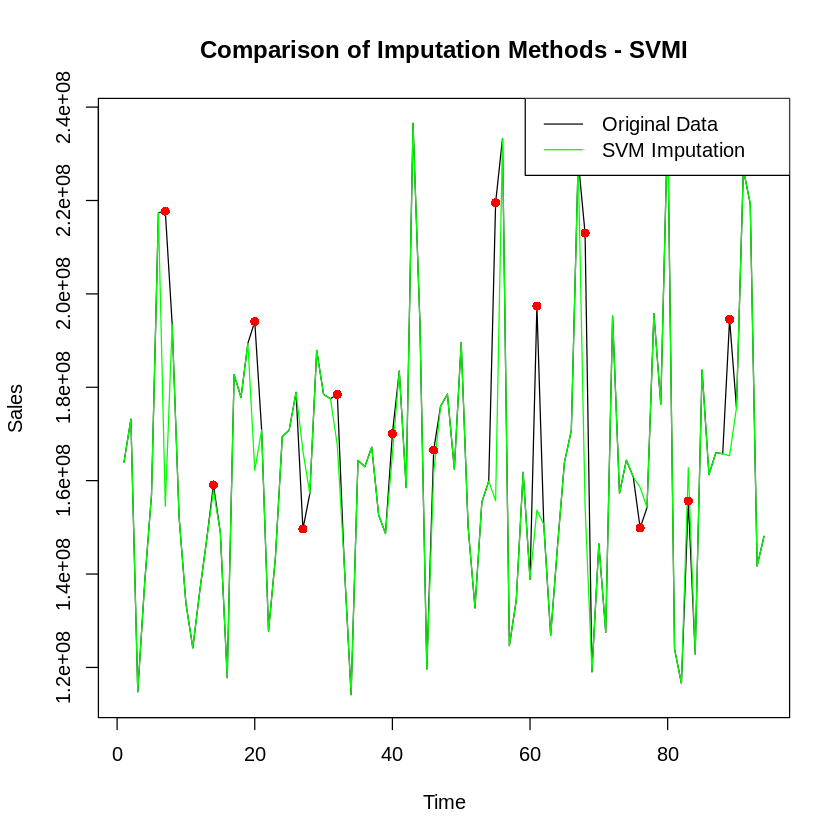

In [ ]:
# Create a plot of the original data
plot(train_data$Sales_VND, type = "l", col = "black", main = "Comparison of Imputation Methods - SVMI", ylab = "Sales", xlab = "Time",
     ylim = range(c(train_data$Sales_VND, data_svm_imputed$Sales_VND), na.rm = TRUE))

# Add lines for each imputation method
lines(data_svm_imputed$Sales_VND, type = "l", col = "green")

# Add a legend
legend("topright", legend = c("Original Data", "SVM Imputation"), # Updated legend
       col = c("black", "green"), lty = 1) # Updated colors

# Highlight the original missing points
points((1:length(train_data$Sales_VND))[missing_indices], train_data$Sales_VND[missing_indices], col = "red", pch = 16)

## Holt-winters

In [ ]:
# Holt-Winters based imputation using na_kalman with auto.arima model
missed_ts <- ts(missed, frequency = 12, start = c(2017, 5))

In [ ]:
# This method can capture seasonality and trend similar to Holt-Winters
# and handles missing values internally.
holt_winters_imputed <- na_kalman(missed_ts, model = "auto.arima")


# Display the imputed data
print("Data after applying Holt-Winters Based Imputation (using na_kalman):")
print(holt_winters_imputed)

[1] "Data after applying Holt-Winters Based Imputation (using na_kalman):"
         Sales_VND datetime
May 2017 163973105    17287
Jun 2017 173165814    17318
Jul 2017 114787131    17348
Aug 2017 138039987    17379
Sep 2017 157056527    17410
Oct 2017 217376740    17440
Nov 2017 168021572    17471
Dec 2017 193532161    17501
Jan 2018 152296746    17532
Feb 2018 133674237    17563
Mar 2018 124166931    17591
Apr 2018 136256232    17622
May 2018 147232309    17652
Jun 2018 142804325    17683
Jul 2018 148882111    17713
Aug 2018 117791593    17744
Sep 2018 182726790    17775
Oct 2018 177795964    17805
Nov 2018 189413291    17836
Dec 2018 186977843    17866
Jan 2019 170859905    17897
Feb 2019 127741101    17928
Mar 2019 143537348    17956
Apr 2019 169468024    17987
May 2019 170818701    18017
Jun 2019 178913503    18048
Jul 2019 134632633    18078
Aug 2019 157206836    18109
Sep 2019 187890311    18140
Oct 2019 178476061    18170
Nov 2019 177560650    18201
Dec 2019 210370454    18231
J

In [ ]:
# Convert the ts object to a vector
holt_winters_imputed_vector <- as.numeric(holt_winters_imputed)

In [ ]:
# Create a data frame for numerical comparison
hwi_comparison_df <- data.frame(
  NA_Index = missing_indices,
  Original_Data = train_data$Sales_VND[missing_indices],
  HWI = holt_winters_imputed[missing_indices])
# Print the comparison table
print("Numerical Comparison of HW Imputation Methods:")
print(hwi_comparison_df)

[1] "Numerical Comparison of HW Imputation Methods:"
   NA_Index Original_Data       HWI
1         7     217714999 168021572
2        14     159082130 142804325
3        20     194080626 186977843
4        27     149643840 134632633
5        32     178469488 210370454
6        40     170058701 133653846
7        46     166535957 135405949
8        55     219532923 184299015
9        61     197377470 173377395
10       68     212994835 210342282
11       76     149879518 143594500
12       83     155649591 150778850
13       89     194527341 160809093


In [ ]:
# Calculate RMSE for Linear Interpolation
rmse_hwi <- sqrt(mean((train_data$Sales_VND[which(is.na(missed))] - holt_winters_imputed[which(is.na(missed))])^2))

# Print the RMSE
print(paste("RMSE for HW Imputation:", rmse_hwi))

[1] "RMSE for HW Imputation: 26813982.7138424"


In [ ]:
# Create a plot of the original data
plot(train_data$Sales_VND, type = "l", col = "black", main = "Comparison of Imputation Methods - HWI", ylab = "Sales", xlab = "Time",
     ylim = range(c(train_data$Sales_VND, holt_winters_imputed), na.rm = TRUE))

# Add lines for each imputation method
lines(holt_winters_imputed_vector, type = "l", col = "purple")

# Add a legend
legend("topright", legend = c("Original Data", "HW Imputation"), # Updated legend
       col = c("black", "purple"), lty = 1) # Updated colors

# Highlight the original missing points
points((1:length(train_data$Sales_VND))[missing_indices], train_data$Sales_VND[missing_indices], col = "red", pch = 16)

# SO SANH 4 PP VA CHON 2 BO DU LIEU

In [ ]:
# Extract the actual values from 'data' at these indices
actual_values <- train_data$Sales_VND[missing_indices]

# Extract the imputed values from each method at the missing indices
li_imputed_values <- li[missing_indices]
knni_imputed_values <- data_imputed$Sales_VND[missing_indices]
svm_imputed_values <- data_svm_imputed$Sales_VND[missing_indices] # Get SVM imputed values
hw_imputed_values <- holt_winters_imputed[missing_indices] # Corrected to access the variable

# Calculate the RMSE for each method
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

li_rmse <- rmse(actual_values, li_imputed_values)
knni_rmse <- rmse(actual_values, knni_imputed_values)
rmse_svm <- rmse(actual_values, svm_imputed_values)
rmse_hw <- rmse(actual_values, hw_imputed_values) # Calculate RMSE for HW

# Create a data frame to compare the RMSE of all methods
comparison_rmse_df <- data.frame(
  Method = c("Linear Interpolation", "KNN Imputation", "SVM Imputation", "Holt-Winters Based Imputation"),
  RMSE = c(li_rmse, knni_rmse, rmse_svm, rmse_hw)
)

# Print the comparison table
print("Comparison of Imputation Methods (RMSE):")
print(comparison_rmse_df)

[1] "Comparison of Imputation Methods (RMSE):"
                         Method     RMSE
1          Linear Interpolation 25211067
2                KNN Imputation 32357125
3                SVM Imputation 34911481
4 Holt-Winters Based Imputation 26813983


* choose LI, HW data

In [ ]:
# Create a data frame for numerical comparison
numerical_comparison_df <- data.frame(
  NA_Index = missing_indices,
  Original_Data = train_data$Sales_VND[missing_indices],
  LI = li[missing_indices],
  KNNI = data_imputed$Sales_VND[missing_indices],
  SVMI = data_svm_imputed$Sales_VND[missing_indices], # Corrected to select the 'visitors' column
  HW = holt_winters_imputed[missing_indices] # Corrected to access time series with single index
)

# Print the comparison table
print("Numerical Comparison of Imputation Methods:")
print(numerical_comparison_df)

[1] "Numerical Comparison of Imputation Methods:"
   NA_Index Original_Data        LI      KNNI      SVMI        HW
1         7     217714999 205454450 171660432 154520593 168021572
2        14     159082130 148057210 134865835 157914500 142804325
3        20     194080626 180136598 169707410 162201264 186977843
4        27     149643840 168060170 172859475 166348392 134632633
5        32     178469488 159929944 160078280 167531072 210370454
6        40     170058701 166076448 162099133 165498493 133653846
7        46     166535957 147793326 180892095 161641230 135405949
8        55     219532923 196590884 161192014 155695229 184299015
9        61     197377470 144752728 142506417 153693268 173377395
10       68     212994835 173846373 165759357 154442065 210342282
11       76     149879518 157519468 166496883 158536537 143594500
12       83     155649591 119718704 156809806 162779377 150778850
13       89     194527341 170678942 179052924 165335741 160809093


# Scaling before building

In [ ]:
# Select only the 'Sales_VND' column from holt_winters_imputed
holt_winters_imputed_sales <- holt_winters_imputed[, "Sales_VND", drop = FALSE]

In [ ]:
# Chuẩn hóa Z-score: (x - mean) / sd
LI_scaled <- scale(li)
holt_winters_imputed_scaled <- scale(holt_winters_imputed_sales)
actual_scaled <- scale(actual_data)

# Display the first few scaled values to verify
print("Scaled LI Imputed Data (first 10):")
print(head(LI_scaled, 10))
print("Scaled HW Imputed Data (first 10):")
print(head(holt_winters_imputed_scaled, 10))

[1] "Scaled LI Imputed Data (first 10):"
             [,1]
 [1,]  0.04816805
 [2,]  0.36892683
 [3,] -1.66806523
 [4,] -0.85670943
 [5,] -0.19317029
 [6,]  1.91156707
 [7,]  1.49556575
 [8,]  1.07956443
 [9,] -0.35925208
[10,] -1.00904240
[1] "Scaled HW Imputed Data (first 10):"
             Jan         Feb Mar Apr         May         Jun         Jul
2017                                  0.04857962  0.36347055 -1.63625750
2018 -0.35138731 -0.98929060                                            
             Aug         Sep         Oct         Nov         Dec
2017 -0.83974436 -0.18834377  1.87789027  0.18725752  1.06110800
2018                                                            


# DL CO MUA

## LI

              Jan          Feb          Mar          Apr          May
2017                                                      0.048168049
2018 -0.359252081 -1.009042399 -1.340778332 -0.918949525 -0.535964152
2019  0.288467354 -1.216065756 -0.664891456  0.239900816  0.287029634
2020 -0.708092503 -1.689768165  0.061336219  0.014227639  0.160072932
2021 -1.498730253 -0.516388733  0.465952788  0.555922246 -0.003746971
2022 -1.324009336 -0.983869383 -0.028135494 -0.827758298 -0.622483503
2023 -1.518963540 -0.563159691 -1.223871541  1.139280247 -0.185556661
2024 -1.347390576 -1.605742755 -1.495989167 -1.386235579  0.735715904
2025 -0.728548196 -0.506275701                                       
              Jun          Jul          Aug          Sep          Oct
2017  0.368926832 -1.668065232 -0.856709430 -0.193170292  1.911567068
2018 -0.507181098 -0.478398043 -1.563231328  0.702535458  0.530485440
2019  0.569479435  0.190776918 -0.187925599  0.882704841  0.554215886
2020 -0.347236069 -0

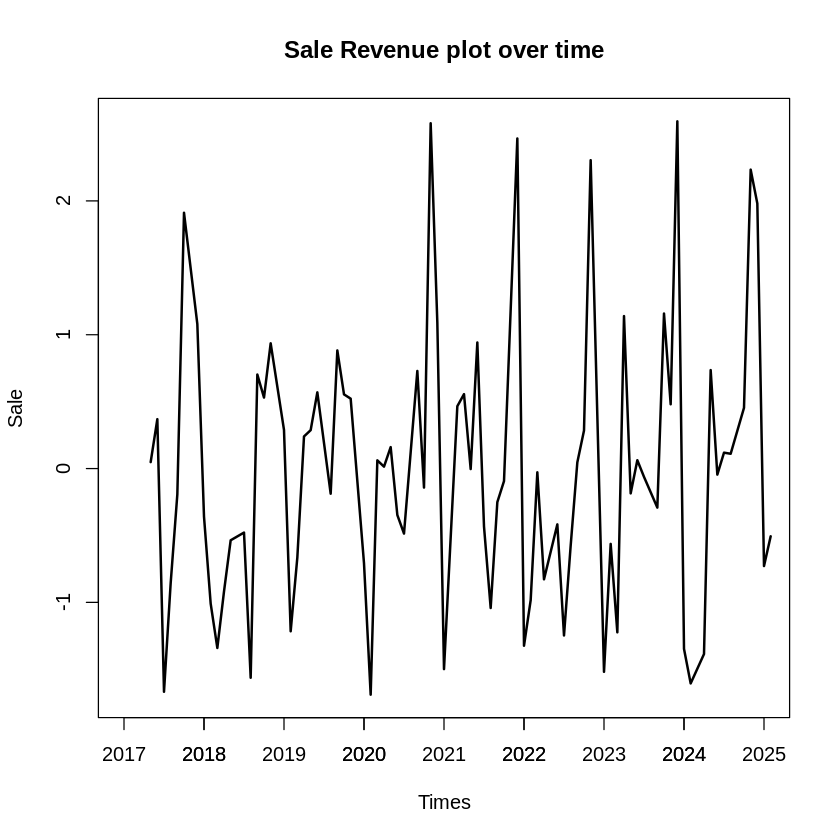

In [ ]:
LI_TIME=ts(LI_scaled,frequency=12,start=c(2017,5))
print(LI_TIME)
plot(LI_TIME,xlim=c(2017, 2025),lwd=2,ylab="Sale",xlab="Times", main="Sale Revenue plot over time")
axis(1, at = seq(2017, 2025, by = 1))

In [ ]:
adf_LI=adf.test(LI_TIME)
print(adf_LI)
kpss_LI= kpss.test(LI_TIME)
print(kpss_LI)

Warning message in adf.test(LI_TIME):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  LI_TIME
Dickey-Fuller = -5.1326, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(LI_TIME):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  LI_TIME
KPSS Level = 0.04418, Truncation lag parameter = 3, p-value = 0.1




Autocorrelations of series ‘LI_TIME’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.281 -0.084 -0.253 -0.283 -0.062  0.110 -0.024 -0.124 -0.263 -0.166 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.226  0.438  0.237 -0.150 -0.241 -0.210 -0.062  0.109  0.084 -0.047 -0.149 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.078  0.156  0.416  0.129 -0.104 -0.226 -0.264  0.056  0.118  0.007 -0.099 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.194 -0.172  0.149  0.280  0.203 -0.070 -0.150 -0.225  0.029  0.112  0.005 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.073 -0.125 -0.113  0.096  0.301  0.240  0.062 -0.075 -0.130 -0.056  0.020 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.016 -0.102 -0.113 -0.064  0.126  0.178 

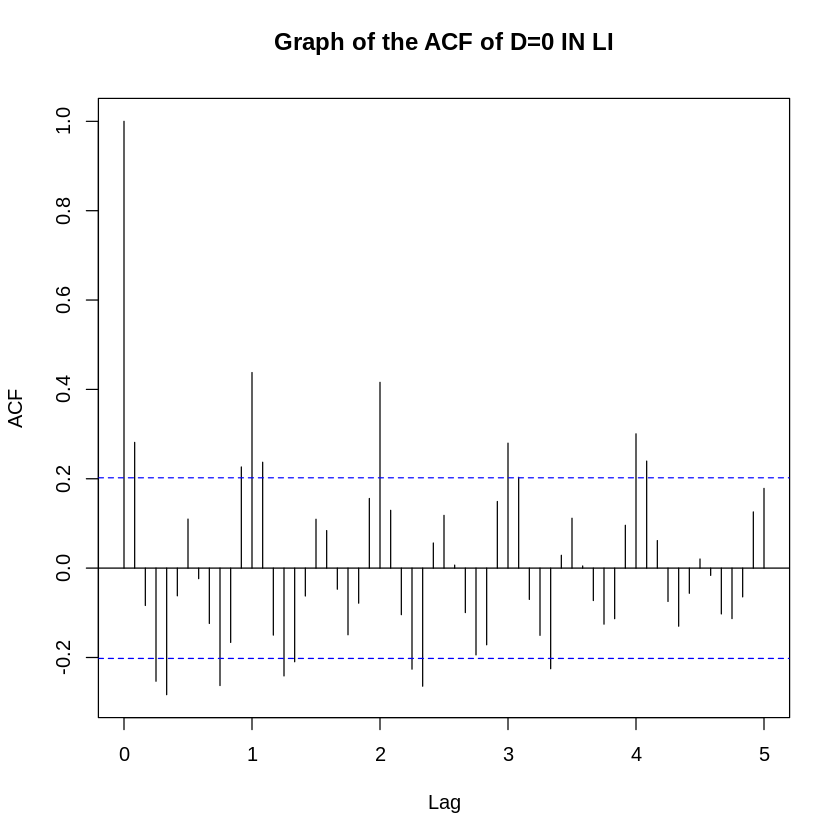

In [ ]:
acf(LI_TIME, lag.max=60, na.action=na.pass, main="Graph of the ACF of D=0 IN LI")
acf(LI_TIME, lag.max=60, plot=FALSE)

              Jan          Feb          Mar          Apr          May
2017                                                                 
2018 -1.438816513 -0.649790319 -0.331735933  0.421828807  0.382985374
2019 -0.323689214 -1.504533111  0.551174301  0.904792272  0.047128818
2020 -0.615183597 -0.981675662  1.751104385 -0.047108580  0.145845292
2021 -2.587835162  0.982341520  0.982341520  0.089969458 -0.559669217
2022 -3.790560887  0.340139953  0.955733889 -0.799622804  0.205274795
2023 -1.911636938  0.955803849 -0.660711850  2.363151788 -1.324836908
2024 -3.942148338 -0.258352179  0.109753588  0.109753588  2.121951483
2025 -2.708858877  0.222272495                                       
              Jun          Jul          Aug          Sep          Oct
2017  0.320758782 -2.036992063  0.811355801  0.663539139  2.104737360
2018  0.028783054  0.028783054 -1.084833284  2.265766785 -0.172050017
2019  0.282449802 -0.378702517 -0.378702517  1.070630440 -0.328488954
2020 -0.507309000 -0

Warning message in adf.test(D1_LI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_LI
Dickey-Fuller = -8.4076, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D1_LI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_LI
KPSS Level = 0.018068, Truncation lag parameter = 3, p-value = 0.1



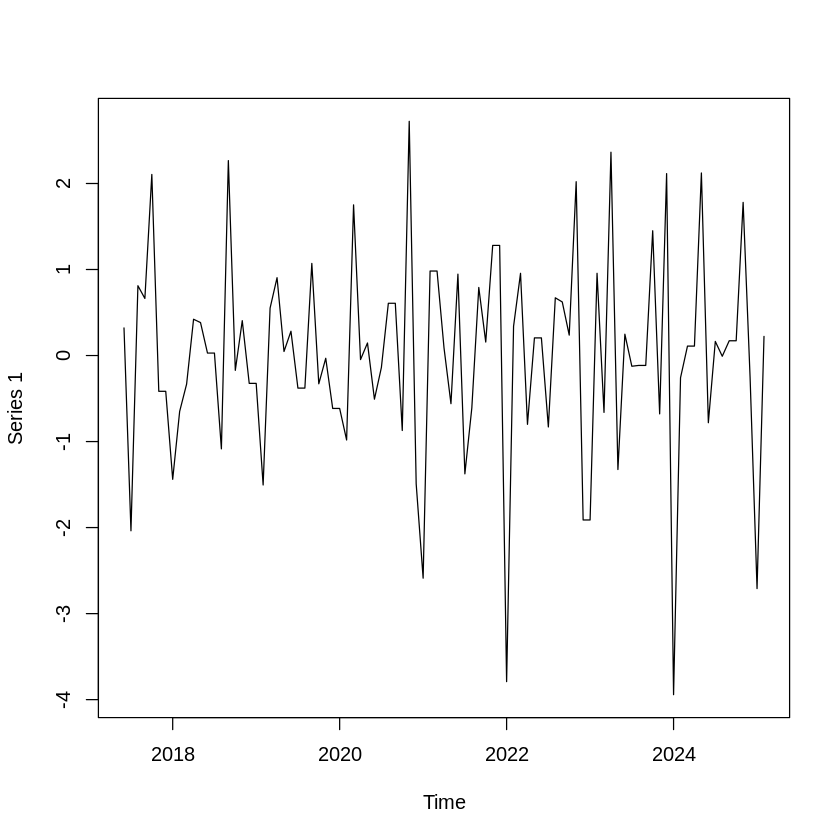

In [ ]:
D1_LI= diff(LI_TIME, differences = 1)
print(D1_LI)
plot.ts(D1_LI)
adf_D1_LI=adf.test(D1_LI)
print(adf_D1_LI)
kpss_D1_LI= kpss.test(D1_LI)
print(kpss_D1_LI)


Autocorrelations of series ‘D1_LI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.248 -0.125 -0.096 -0.182  0.033  0.212 -0.023  0.027 -0.161 -0.214 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.126  0.287  0.131 -0.191 -0.093 -0.079 -0.023  0.138  0.074 -0.020 -0.121 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.109 -0.027  0.383 -0.041 -0.070 -0.051 -0.258  0.179  0.118 -0.006 -0.005 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.082 -0.209  0.136  0.141  0.136 -0.120 -0.009 -0.234  0.119  0.128 -0.018 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.011 -0.049 -0.135  0.003  0.182  0.077 -0.019 -0.050 -0.101  0.001  0.076 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
 0.032 -0.051 -0.039 -0.100  0.096  0.060 

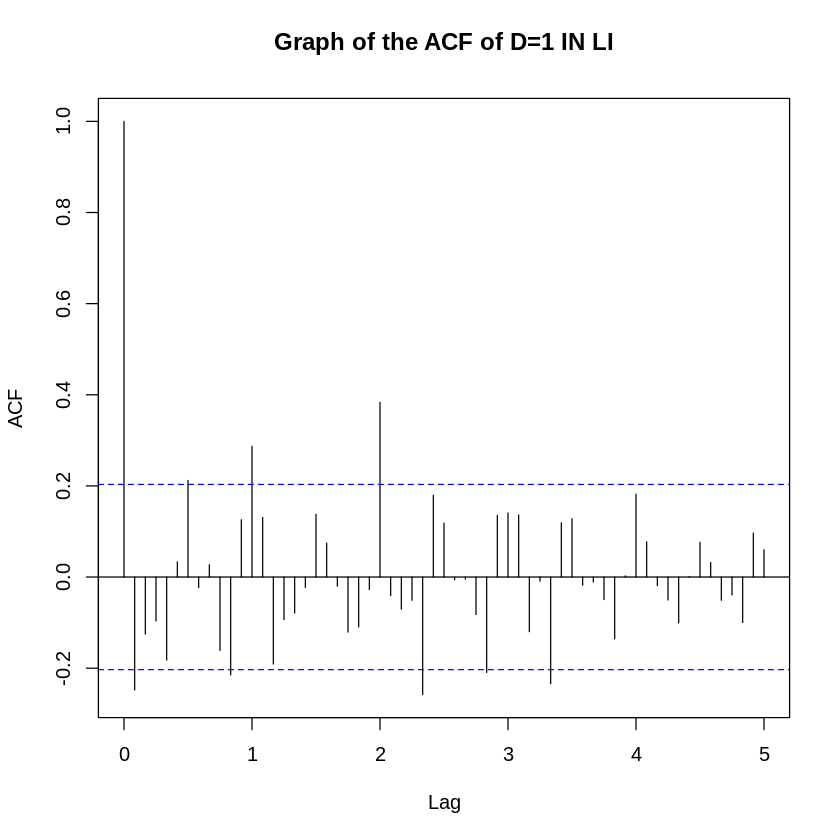

In [ ]:
acf(D1_LI, lag.max=60, na.action=na.pass, main="Graph of the ACF of D=1 IN LI")
acf(D1_LI, lag.max=60, plot=FALSE)

* Q = 1,2,3


Partial autocorrelations of series ‘D1_LI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.248 -0.198 -0.203 -0.344 -0.261 -0.015 -0.083 -0.027 -0.179 -0.389 -0.326 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.038  0.172 -0.109 -0.107 -0.002 -0.037 -0.051 -0.087 -0.063 -0.098 -0.037 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.200  0.093 -0.007 -0.015  0.068 -0.230  0.080  0.136  0.081 -0.088  0.013 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
 0.002 -0.053 -0.080 -0.032 -0.100  0.144 -0.075  0.018 -0.015 -0.001 -0.052 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
-0.060 -0.014 -0.084 -0.084 -0.087 -0.099 -0.023  0.156  0.023 -0.071  0.098 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.042 -0.008 -0.049  0.107  0.105 

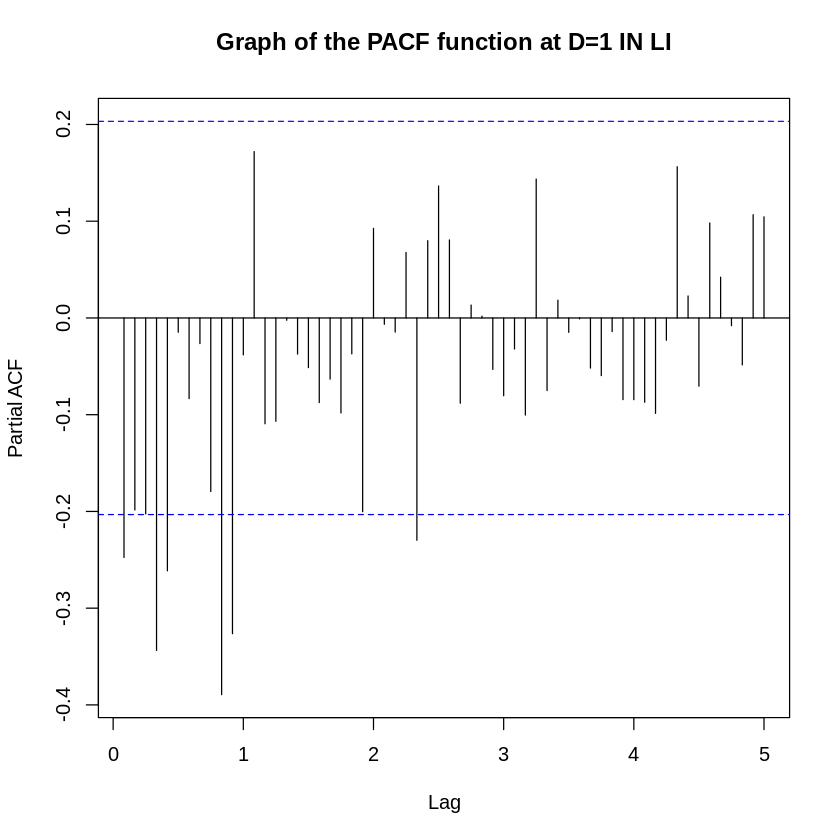

In [ ]:
pacf(D1_LI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function at D=1 IN LI")
pacf(D1_LI, lag.max = 60, plot = FALSE)

* P=1,3

## HWI

              Jan          Feb          Mar          Apr          May
2017                                                      0.048579616
2018 -0.351387314 -0.989290599 -1.314957872 -0.900845852 -0.524866677
2019  0.284482970 -1.192526744 -0.651435431  0.236804891  0.283071551
2020 -0.693846174 -1.657563409  0.061506892  0.015260100  0.158437350
2021 -1.470020277 -0.929971809  0.458721548  0.547045137 -0.002385689
2022 -1.298495642 -0.964578089 -0.026328057 -0.811322845  0.370718147
2023 -1.489883423 -0.551564711 -1.200189732  1.119731393 -0.180869417
2024 -1.321449154 -1.575075130 -0.403381965 -1.359583540  0.723549714
2025 -0.713927657 -0.495721336                                       
              Jun          Jul          Aug          Sep          Oct
2017  0.363470551 -1.636257501 -0.839744356 -0.188343767  1.877890273
2018 -0.676544705 -0.468353663 -1.533341391  0.690976259  0.522073663
2019  0.560354316 -0.956461293 -0.183195019  0.867849687  0.545369993
2020 -0.339591119 -0

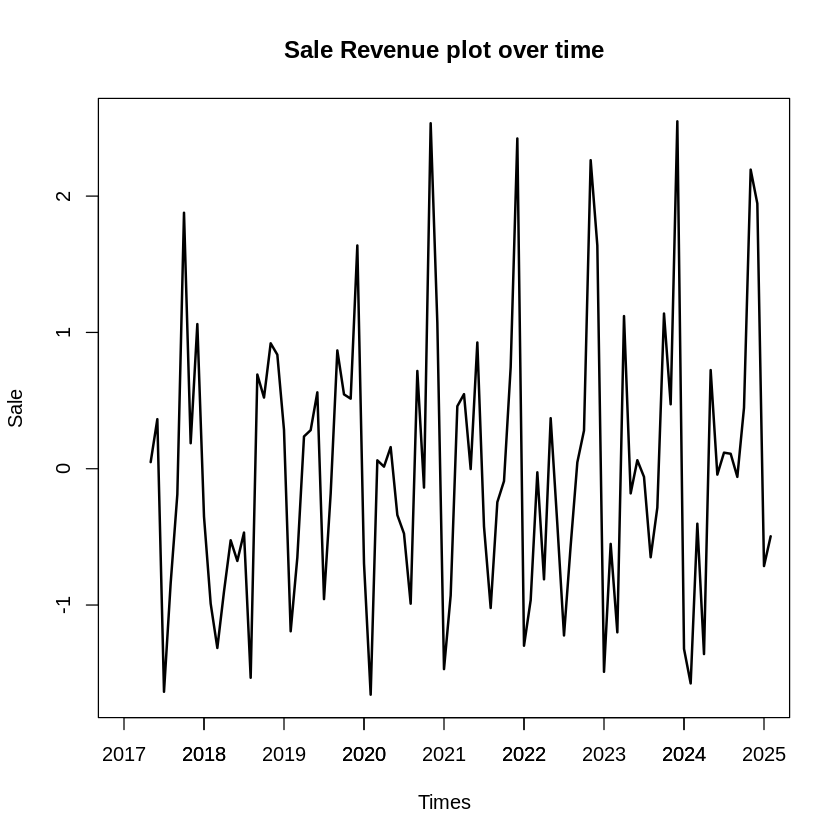

In [ ]:
HWI_TIME=ts(holt_winters_imputed_scaled,frequency=12,start=c(2017,5))
print(HWI_TIME)
plot(HWI_TIME,xlim=c(2017, 2025),lwd=2,ylab="Sale",xlab="Times", main="Sale Revenue plot over time")
axis(1, at = seq(2017, 2025, by = 1))

In [ ]:
adf_HWI=adf.test(HWI_TIME)
print(adf_HWI)
kpss_HWI= kpss.test(HWI_TIME)
print(kpss_HWI)

Warning message in adf.test(HWI_TIME):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  HWI_TIME
Dickey-Fuller = -5.5439, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(HWI_TIME):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  HWI_TIME
KPSS Level = 0.095408, Truncation lag parameter = 3, p-value = 0.1




Autocorrelations of series ‘HWI_TIME’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.183 -0.138 -0.256 -0.268  0.006  0.195  0.020 -0.147 -0.265 -0.255 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.296  0.516  0.231 -0.191 -0.223 -0.284 -0.026  0.214  0.079 -0.111 -0.237 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.136  0.149  0.570  0.123 -0.097 -0.192 -0.298  0.027  0.175  0.052 -0.131 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.192 -0.231  0.204  0.307  0.183 -0.088 -0.157 -0.239  0.019  0.178  0.030 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.032 -0.175 -0.118  0.098  0.328  0.154  0.031 -0.108 -0.190 -0.045  0.057 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
 0.029 -0.088 -0.108 -0.094  0.156  0.194 

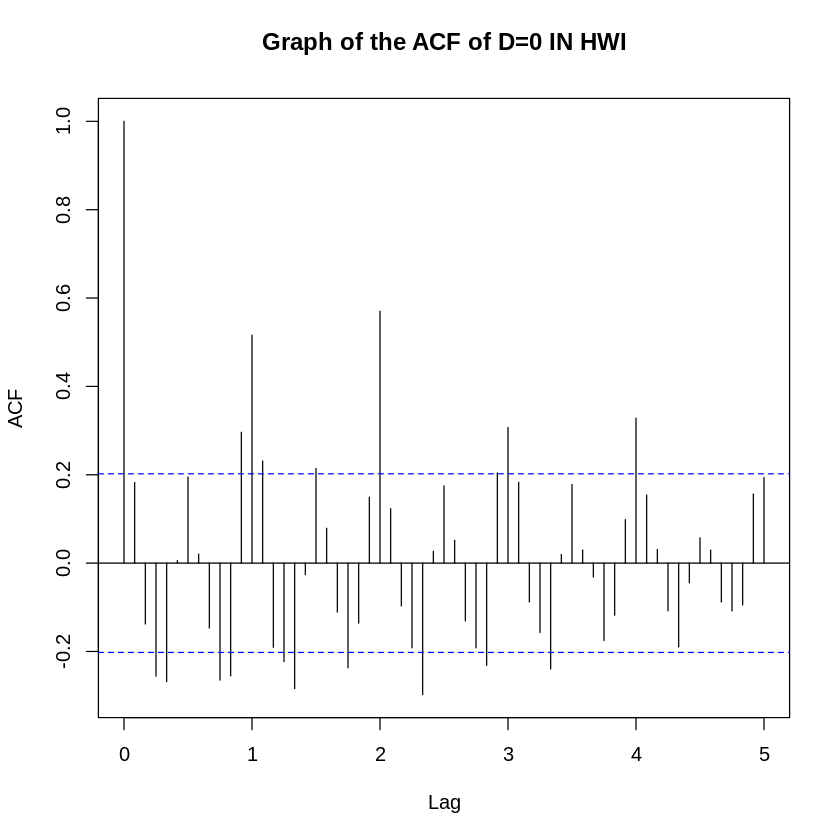

In [ ]:
acf(HWI_TIME, lag.max=60, na.action=na.pass, main="Graph of the ACF of D=0 IN HWI")
acf(HWI_TIME, lag.max=60, plot=FALSE)

              Jan          Feb          Mar          Apr          May
2017                                                                 
2018 -1.412495313 -0.637903285 -0.325667273  0.414112020  0.375979175
2019 -0.552110637 -1.477009715  0.541091313  0.888240322  0.046266660
2020 -2.331740172 -0.963717235  1.719070301 -0.046246793  0.143177250
2021 -2.540494222  0.540048468  1.388693357  0.088323589 -0.549430826
2022 -3.721217709  0.333917554  0.938250032 -0.784994788  1.182040992
2023 -3.126812395  0.938318712 -0.648625022  2.319921126 -1.300600811
2024 -3.870032072 -0.253625976  1.171693165 -0.956201575  2.083133254
2025 -2.659303972  0.218206321                                       
              Jun          Jul          Aug          Sep          Oct
2017  0.314890935 -1.999728052  0.796513146  0.651400589  2.066234040
2018 -0.151678028  0.208191042 -1.064987728  2.224317650 -0.168902595
2019  0.277282765 -1.516815609  0.773266274  1.051044706 -0.322479694
2020 -0.498028469 -0

Warning message in adf.test(D1_HWI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_HWI
Dickey-Fuller = -9.2274, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D1_HWI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_HWI
KPSS Level = 0.018435, Truncation lag parameter = 3, p-value = 0.1



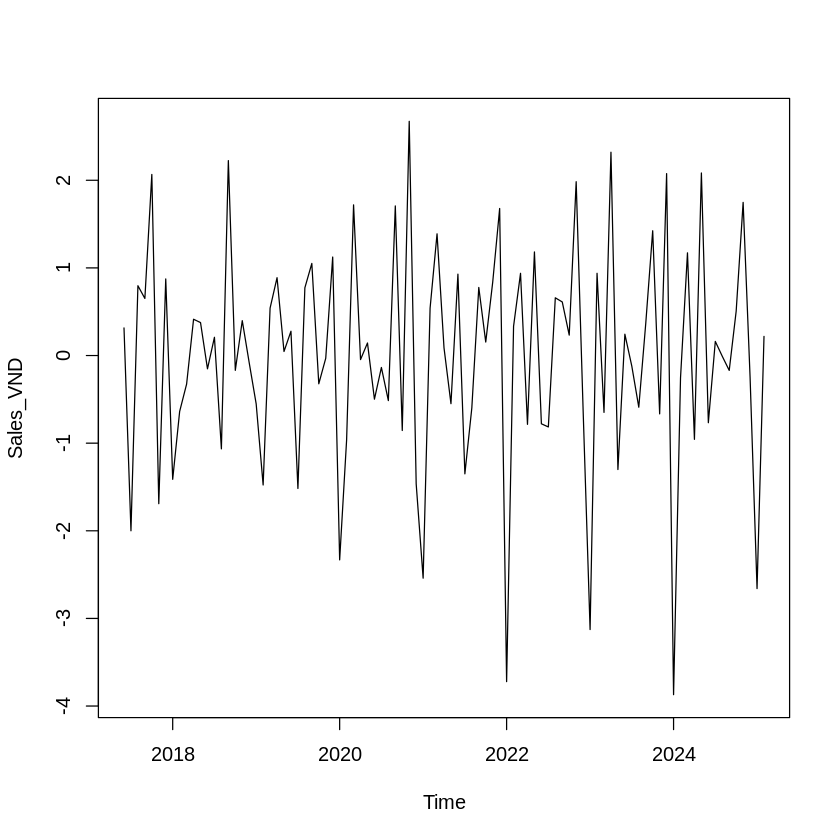

In [ ]:
D1_HWI= diff(HWI_TIME, differences = 1)
print(D1_HWI)
plot.ts(D1_HWI)
adf_D1_HWI=adf.test(D1_HWI)
print(adf_D1_HWI)
kpss_D1_HWI= kpss.test(D1_HWI)
print(kpss_D1_HWI)


Autocorrelations of series ‘D1_HWI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.305 -0.114 -0.064 -0.181  0.049  0.224 -0.005 -0.030 -0.075 -0.339 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.206  0.305  0.085 -0.226  0.011 -0.194  0.006  0.229  0.035 -0.039 -0.139 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.109 -0.091  0.534 -0.142 -0.066  0.009 -0.271  0.108  0.164  0.034 -0.071 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.010 -0.296  0.207  0.136  0.089 -0.111  0.003 -0.212  0.061  0.185 -0.051 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.056 -0.126 -0.096 -0.009  0.243 -0.033  0.018 -0.030 -0.148  0.029  0.073 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
 0.056 -0.058 -0.019 -0.146  0.131  0.075 

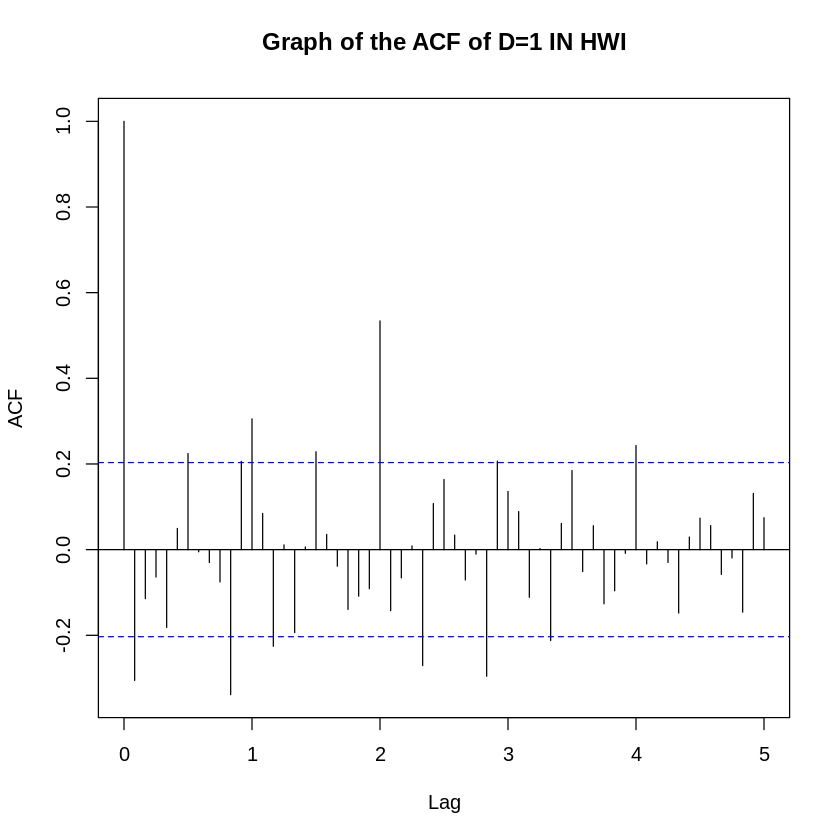

In [ ]:
acf(D1_HWI, lag.max=60, na.action=na.pass, main="Graph of the ACF of D=1 IN HWI")
acf(D1_HWI, lag.max=60, plot=FALSE)

=> Q=1,2,3,4


Partial autocorrelations of series ‘D1_HWI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.305 -0.229 -0.206 -0.373 -0.315 -0.049 -0.031 -0.036 -0.058 -0.477 -0.412 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.093  0.236 -0.106 -0.010  0.022 -0.083 -0.022  0.030 -0.087 -0.153  0.091 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.293  0.069  0.047 -0.080  0.019 -0.052  0.112  0.013  0.107 -0.072  0.006 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
 0.024  0.070 -0.101 -0.049 -0.052  0.011 -0.048  0.017 -0.032 -0.088 -0.026 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.021 -0.023  0.010 -0.107 -0.103 -0.031  0.037  0.177  0.032 -0.047  0.070 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.039 -0.115 -0.053  0.056  0.094 

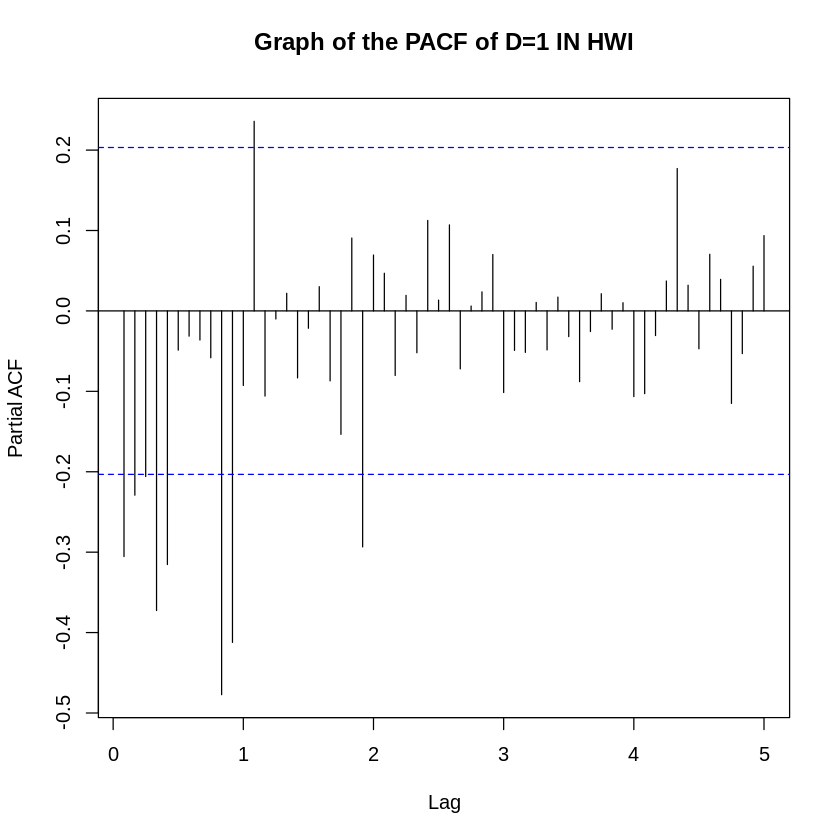

In [ ]:
pacf(D1_HWI, lag.max=60, na.action=na.pass, main="Graph of the PACF of D=1 IN HWI")
pacf(D1_HWI, lag.max=60, plot=FALSE)

=> P=1,2

# DL KHONG MUA

## LI TIME

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2018,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2019,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2020,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2021,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2022,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2023,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2024,-0.880635101,-1.056466712,-0.585387548,-0.144859028,0.004949428,0.055466974,-0.326901098,-0.458693238,0.341860215,0.424999390,1.411006424,1.214660293
2025,-0.880635101,-1.056466712,,,,,,,,,,


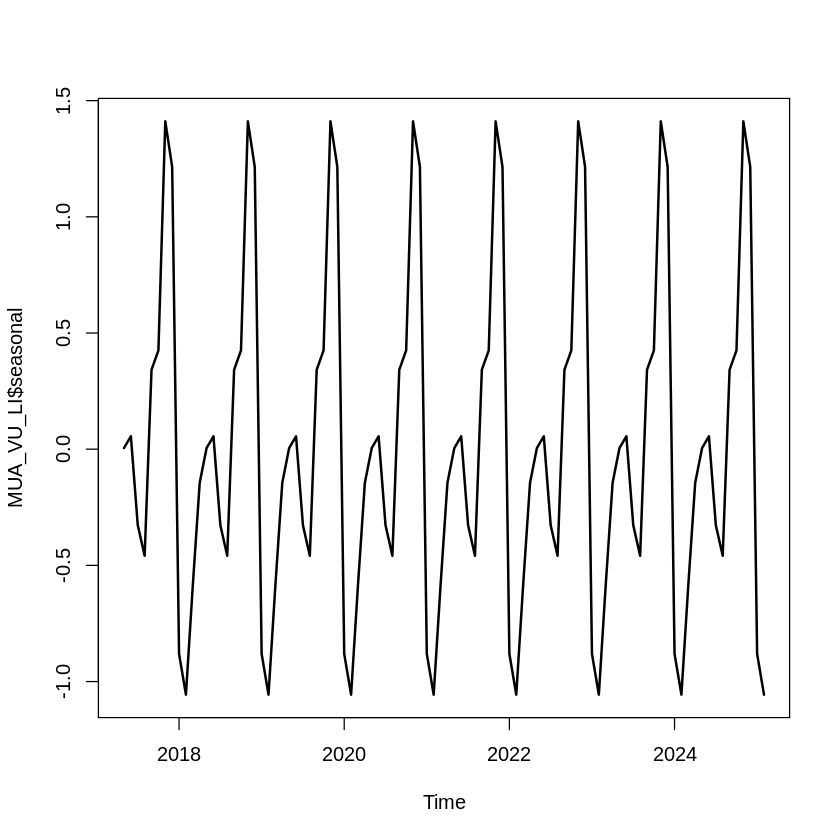

In [ ]:
MUA_VU_LI=decompose(LI_TIME)
MUA_VU_LI$seasonal
plot(MUA_VU_LI$seasonal, col="black", lwd=2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,0.043218622,0.313459857,-1.341164134,-0.398016192,-0.535030507,1.486567679,0.084559326,-0.135095862
2018,0.521383020,0.047424313,-0.755390784,-0.774090498,-0.540913579,-0.562648072,-0.151496946,-1.104538090,0.360675242,0.105486050,-0.475160642,-0.602503725
2019,1.169102455,-0.159599044,-0.079503908,0.384759843,0.282080206,0.514012461,0.517678016,0.270767639,0.540844625,0.129216496,-0.888731733,-1.307569200
2020,0.172542598,-0.633301453,0.646723768,0.159086667,0.155123504,-0.402703043,-0.159120765,0.580252665,0.387280501,-0.567054857,1.169333450,-0.125555385
2021,-0.618095152,0.540077980,1.051340336,0.700781274,-0.008696398,0.886593867,-0.106224840,-0.583347293,-0.592752899,-0.518967605,-0.224714756,1.251891258
2022,-0.443374235,0.072597329,0.557252054,-0.682899270,-0.627432931,-0.472675683,-0.920444288,-0.117591600,-0.295437466,-0.141132853,0.893303912,-0.821986895
2023,-0.638328439,0.493307021,-0.638483993,1.284139274,-0.190506089,0.006856221,0.264716398,0.281676243,-0.633709506,0.733415895,-0.930702114,1.380097469
2024,-0.466755475,-0.549276043,-0.910601619,-1.241376551,0.730766476,-0.100722764,0.445749167,0.569198454,-0.059707138,0.028801548,0.822816255,0.765650388
2025,0.152086905,0.550191011,,,,,,,,,,


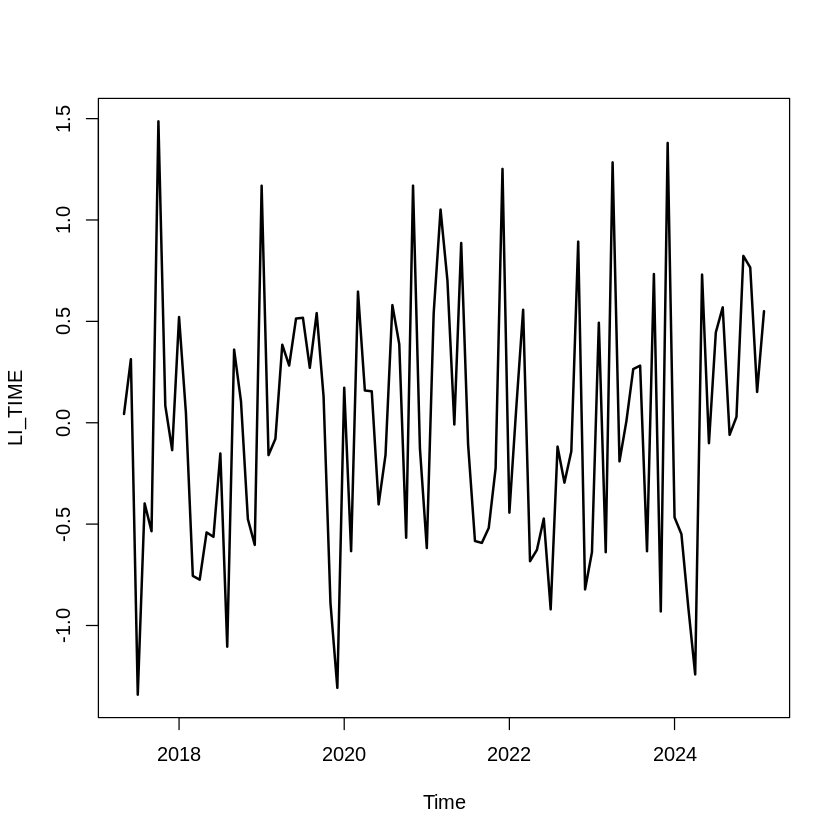

In [ ]:
KHUMUA_LI=LI_TIME-MUA_VU_LI$seasonal
plot(KHUMUA_LI, col="black", lwd=2)
KHUMUA_LI

In [ ]:
adf_LI_KHUMUA=adf.test(KHUMUA_LI)
print(adf_LI_KHUMUA)
kpss_LI_KHUMUA= kpss.test(KHUMUA_LI)
print(kpss_LI_KHUMUA)

Warning message in adf.test(KHUMUA_LI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  KHUMUA_LI
Dickey-Fuller = -4.646, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(KHUMUA_LI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  KHUMUA_LI
KPSS Level = 0.10193, Truncation lag parameter = 3, p-value = 0.1




Autocorrelations of series ‘KHUMUA_LI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.022  0.074  0.038 -0.097 -0.079 -0.019 -0.073  0.140 -0.091 -0.137 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.009 -0.115  0.033 -0.089 -0.014  0.076 -0.107 -0.024  0.111  0.114  0.072 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.094 -0.053 -0.008 -0.168 -0.005 -0.065 -0.130  0.180  0.011 -0.005 -0.006 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.077 -0.096 -0.003 -0.235  0.088 -0.021 -0.010 -0.083  0.086  0.015 -0.049 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.004  0.079  0.013 -0.007  0.007  0.102  0.148  0.091  0.091 -0.028 -0.044 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.027 -0.117  0.026 -0.015  0.009 -0.072 

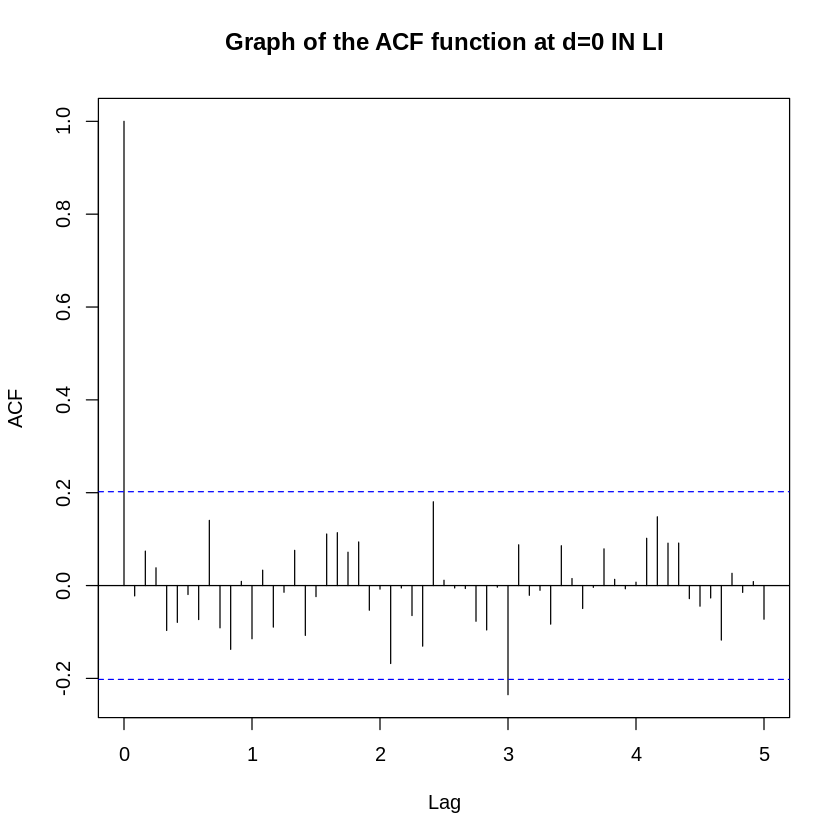

In [ ]:
acf(KHUMUA_LI,lag.max = 60,na.action = na.pass,
main = "Graph of the ACF function at d=0 IN LI")
acf(KHUMUA_LI, lag.max = 60, plot = FALSE)

* q=3


Partial autocorrelations of series ‘KHUMUA_LI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.022  0.074  0.042 -0.101 -0.091 -0.010 -0.053  0.140 -0.093 -0.177 -0.010 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.069  0.053 -0.125 -0.043  0.037 -0.108 -0.016  0.065  0.150  0.020  0.051 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.062 -0.062 -0.101  0.025 -0.081 -0.197  0.202  0.072 -0.007 -0.070 -0.046 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.076 -0.060 -0.201 -0.038 -0.042 -0.011 -0.204  0.047 -0.042 -0.079  0.016 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
-0.021 -0.019  0.036 -0.032  0.015  0.070  0.107  0.086 -0.112  0.010  0.103 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.032  0.028 -0.056  0.048 -0.085 

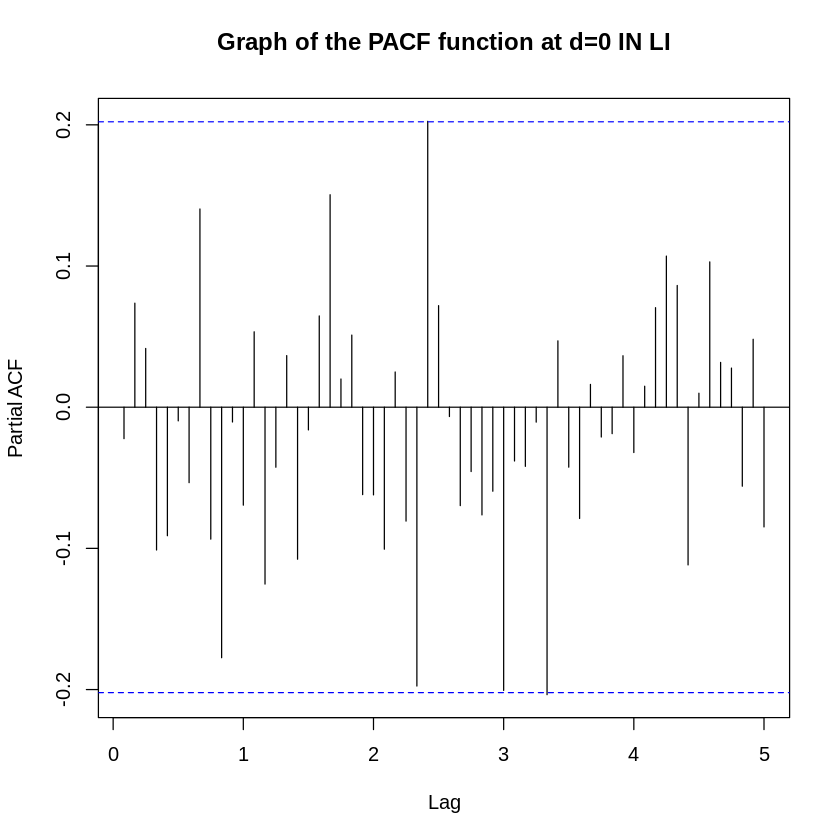

In [ ]:
pacf(KHUMUA_LI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function at d=0 IN LI")
pacf(KHUMUA_LI, lag.max = 60, plot = FALSE)

p=4

## HWI TIME

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2018,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2019,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2020,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2021,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2022,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2023,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2024,-0.86207170,-1.09530421,-0.41822041,-0.13573082,0.14377919,0.01996077,-0.49328474,-0.68588996,0.32720963,0.40143936,1.14431984,1.65379305
2025,-0.86207170,-1.09530421,,,,,,,,,,


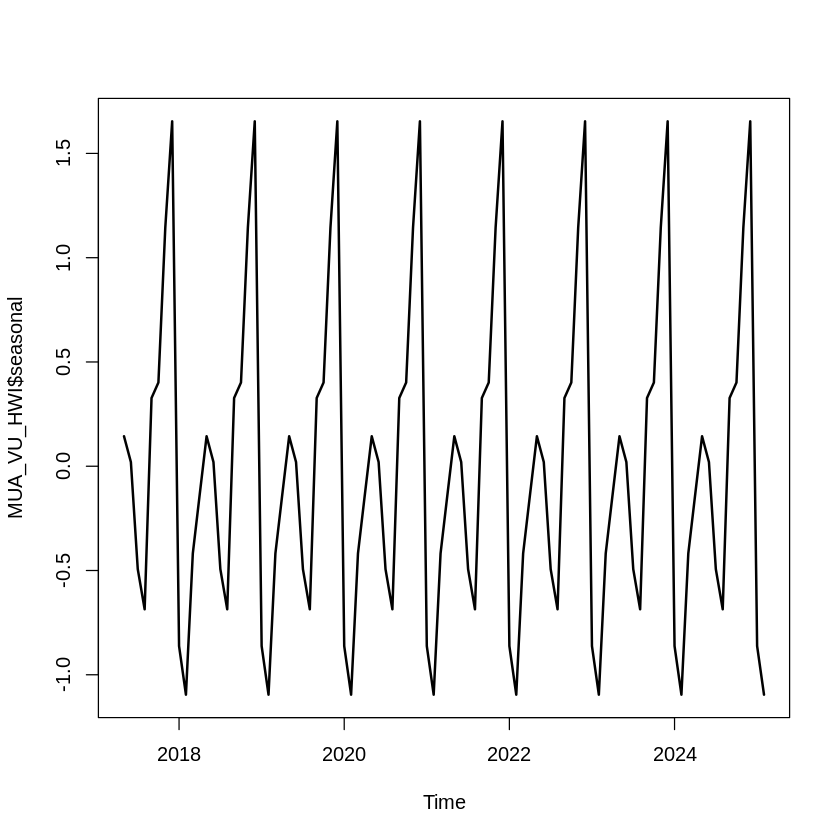

In [ ]:
MUA_VU_HWI=decompose(HWI_TIME)
MUA_VU_HWI$seasonal
plot(MUA_VU_HWI$seasonal, col="black", lwd=2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,-0.09519957,0.34350978,-1.14297276,-0.15385439,-0.51555340,1.47645091,-0.95706233,-0.59268505
2018,0.51068439,0.10601361,-0.89673747,-0.76511503,-0.66864586,-0.69650548,0.02493108,-0.84745143,0.36376663,0.12063430,-0.22430136,-0.81719944
2019,1.14655467,-0.09722254,-0.23321502,0.37253571,0.13929236,0.54039355,-0.46317655,0.50269494,0.54064006,0.14393063,-0.63030672,-0.01589905
2020,0.16822553,-0.56225920,0.47972730,0.15099092,0.01465816,-0.35955189,0.01744672,-0.30409913,0.38988518,-0.53960338,1.39010894,-0.58331911
2021,-0.60794857,0.16533240,0.87694195,0.68277596,-0.14616488,0.90615908,0.06937499,-0.33579511,-0.57221983,-0.49239582,-0.39948793,0.76892901
2022,-0.43642394,0.13072612,0.39189235,-0.67559202,0.22693896,-0.42824447,-0.72994942,0.12144021,-0.28034338,-0.12147304,1.11912899,-0.01686408
2023,-0.62781172,0.54373949,-0.78196933,1.25546222,-0.32464860,0.04251504,0.43353036,0.03641224,-0.61242720,0.73707702,-0.67150931,0.89478987
2024,-0.45937745,-0.47977092,0.01483844,-1.22385272,0.57977053,-0.06309593,0.61125138,0.79566637,-0.38701140,0.04535264,1.04993081,0.29158326
2025,0.14814405,0.59958287,,,,,,,,,,


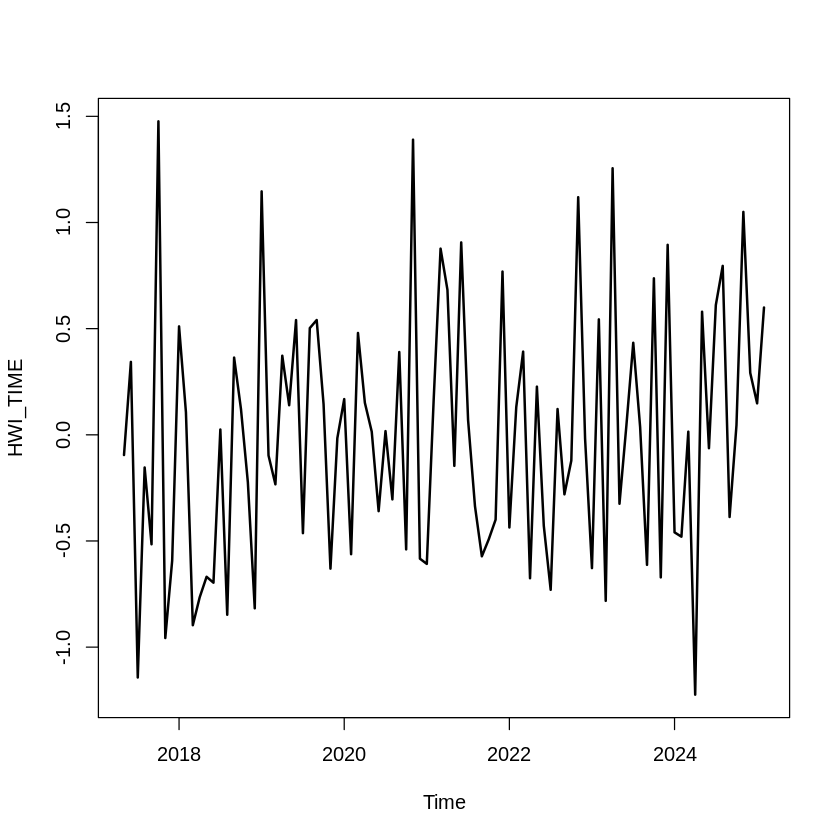

In [ ]:
KHUMUA_HWI=HWI_TIME-MUA_VU_HWI$seasonal
plot(KHUMUA_HWI, col="black", lwd=2)
KHUMUA_HWI

In [ ]:
adf_HWI_KHUMUA=adf.test(KHUMUA_HWI)
print(adf_HWI_KHUMUA)
kpss_HWI_KHUMUA= kpss.test(KHUMUA_HWI)
print(kpss_HWI_KHUMUA)


	Augmented Dickey-Fuller Test

data:  KHUMUA_HWI
Dickey-Fuller = -4.008, Lag order = 4, p-value = 0.01225
alternative hypothesis: stationary



Warning message in kpss.test(KHUMUA_HWI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  KHUMUA_HWI
KPSS Level = 0.33252, Truncation lag parameter = 3, p-value = 0.1




Autocorrelations of series ‘KHUMUA_HWI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.232  0.049  0.075  0.006  0.016 -0.035 -0.046  0.197 -0.049 -0.221 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.199 -0.169  0.079 -0.148  0.063 -0.017 -0.088  0.001  0.075  0.078 -0.037 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.111 -0.137  0.194 -0.143  0.079  0.009 -0.145  0.119 -0.040 -0.002 -0.024 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.006 -0.184  0.086 -0.301  0.172 -0.048 -0.018 -0.027  0.071  0.053 -0.042 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.103 -0.027  0.087 -0.053  0.006  0.013  0.114  0.025  0.032 -0.030 -0.053 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
 0.039 -0.118  0.064 -0.018  0.040 -0.105 

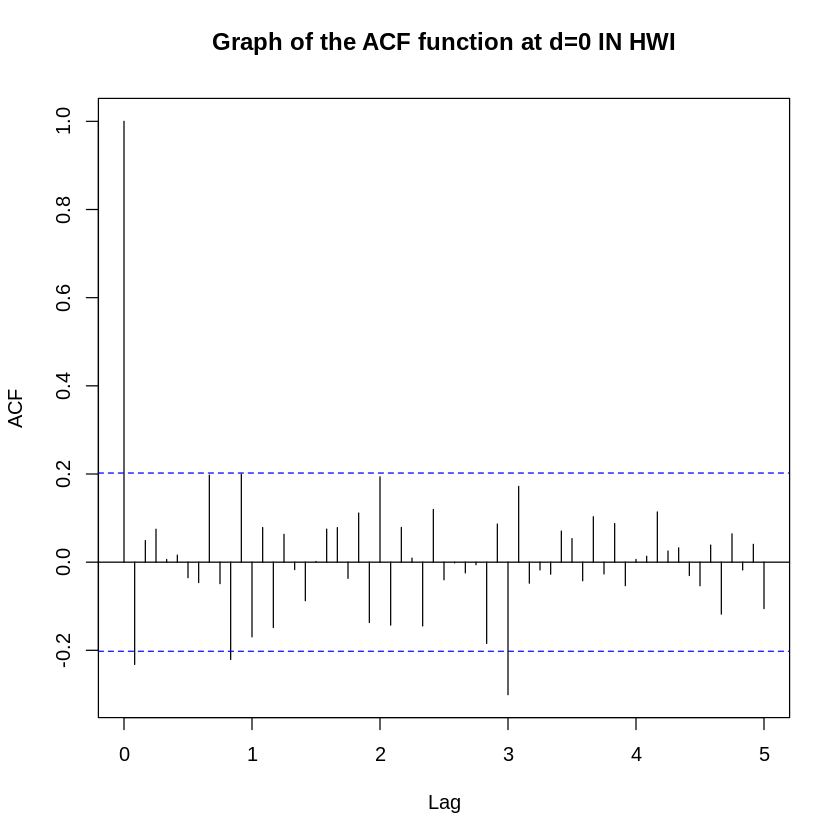

In [ ]:
acf(KHUMUA_HWI,lag.max = 60,na.action = na.pass,
main = "Graph of the ACF function at d=0 IN HWI")
acf(KHUMUA_HWI, lag.max = 60, plot = FALSE)

* q=1,3


Partial autocorrelations of series ‘KHUMUA_HWI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.232 -0.005  0.090  0.046  0.024 -0.038 -0.074  0.182  0.054 -0.251  0.075 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.105  0.050 -0.123  0.036 -0.055 -0.092  0.066  0.040  0.135  0.024  0.089 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.129  0.094 -0.003 -0.010 -0.014 -0.232  0.117 -0.014  0.073 -0.051 -0.072 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.136 -0.066 -0.118  0.021  0.029  0.014 -0.127  0.130  0.103  0.056  0.066 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
-0.048 -0.071  0.098 -0.060 -0.007  0.007  0.129  0.059 -0.073  0.020  0.031 
4.6667 4.7500 4.8333 4.9167 5.0000 
-0.026  0.009  0.034 -0.004 -0.049 

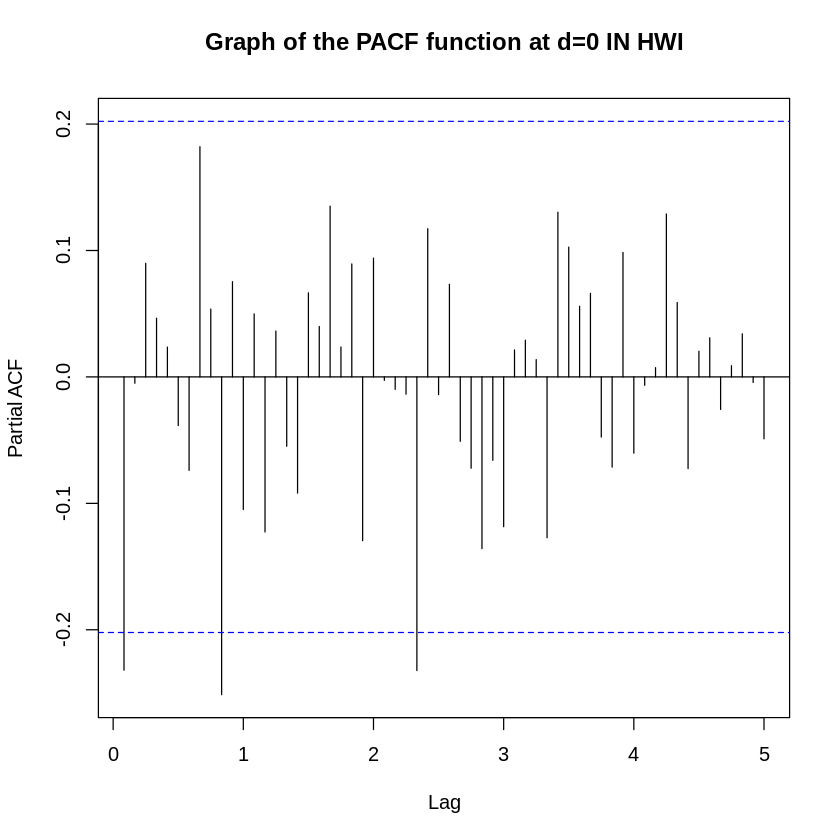

In [ ]:
pacf(KHUMUA_HWI,lag.max = 60,na.action = na.pass,main = "Graph of the PACF function at d=0 IN HWI")
pacf(KHUMUA_HWI, lag.max = 60, plot = FALSE)

p=1,3

# XAY DUNG SARIMA

## LI TIME

* p=4,d=0,q=3
* P=1,3;D=1;Q=1,2,3

In [ ]:
MH1<-Arima(LI_TIME,order = c(4,0,3),
  seasonal = list(order = c(1,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
MH2<-Arima(LI_TIME,order = c(4,0,3),
  seasonal = list(order = c(1,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
MH3<-Arima(LI_TIME,order = c(4,0,3),
  seasonal = list(order = c(1,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)
MH4<-Arima(LI_TIME,order = c(4,0,3),
  seasonal = list(order = c(3,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
MH5<-Arima(LI_TIME,order = c(4,0,3),
  seasonal = list(order = c(3,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
MH6<-Arima(LI_TIME,order = c(4,0,3),
  seasonal = list(order = c(3,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)

Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”


In [ ]:
AIC(MH1,MH2,MH3,MH4,MH5,MH6)
BIC(MH1,MH2,MH3,MH4,MH5,MH6)

,df,AIC
,<dbl>,<dbl>
MH1,10,201.5680
MH2,11,200.7935
MH3,12,198.9715
MH4,12,201.3156
MH5,13,203.2724
MH6,14,204.6986


,df,BIC
,<dbl>,<dbl>
MH1,10,225.6352
MH2,11,227.2674
MH3,12,227.8521
MH4,12,230.1962
MH5,13,234.5598
MH6,14,238.3927


* AIC: MH3
* BIC: MH1


	Ljung-Box test

data:  Residuals from ARIMA(4,0,3)(1,1,1)[12]
Q* = 14.011, df = 11, p-value = 0.2324

Model df: 9.   Total lags used: 20



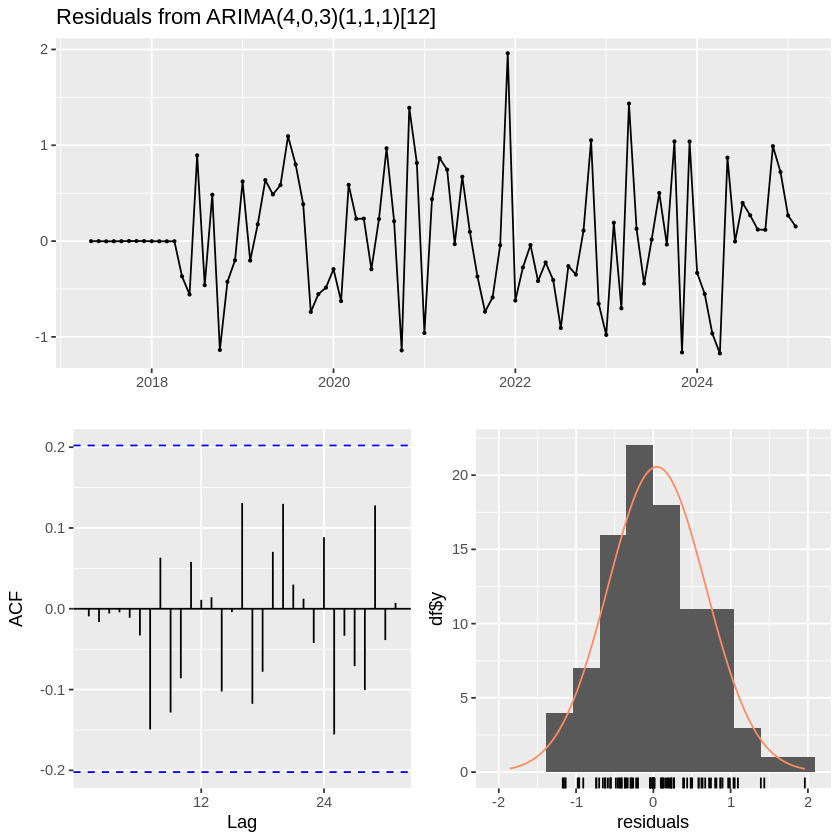

In [ ]:
checkresiduals(MH1, lag = 20)

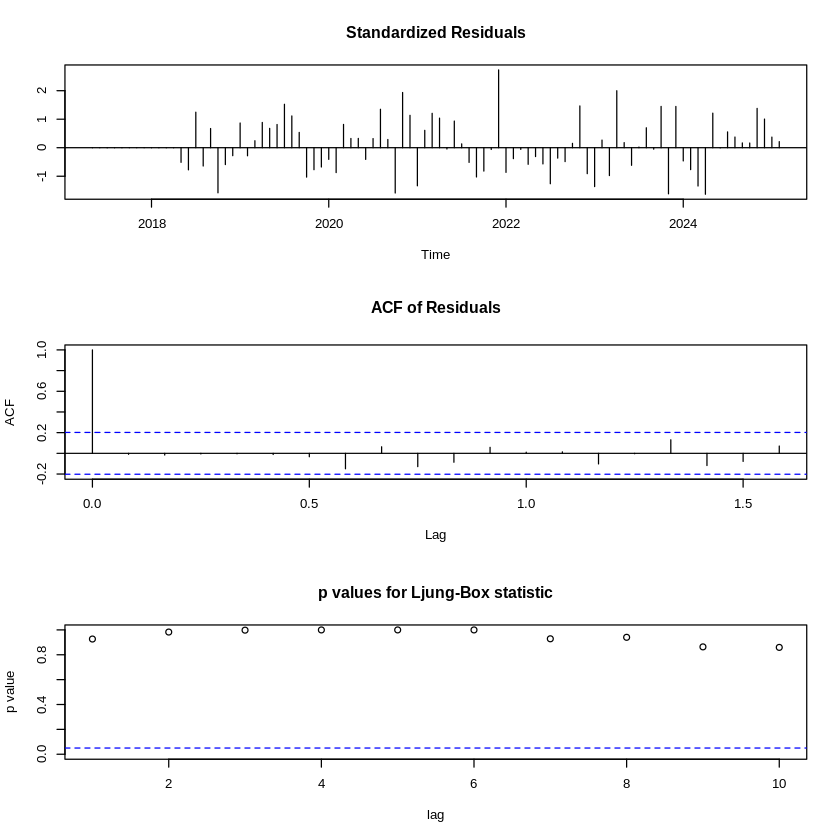

In [ ]:
tsdiag(MH1)


	Ljung-Box test

data:  Residuals from ARIMA(4,0,3)(1,1,3)[12]
Q* = 12.038, df = 9, p-value = 0.2112

Model df: 11.   Total lags used: 20



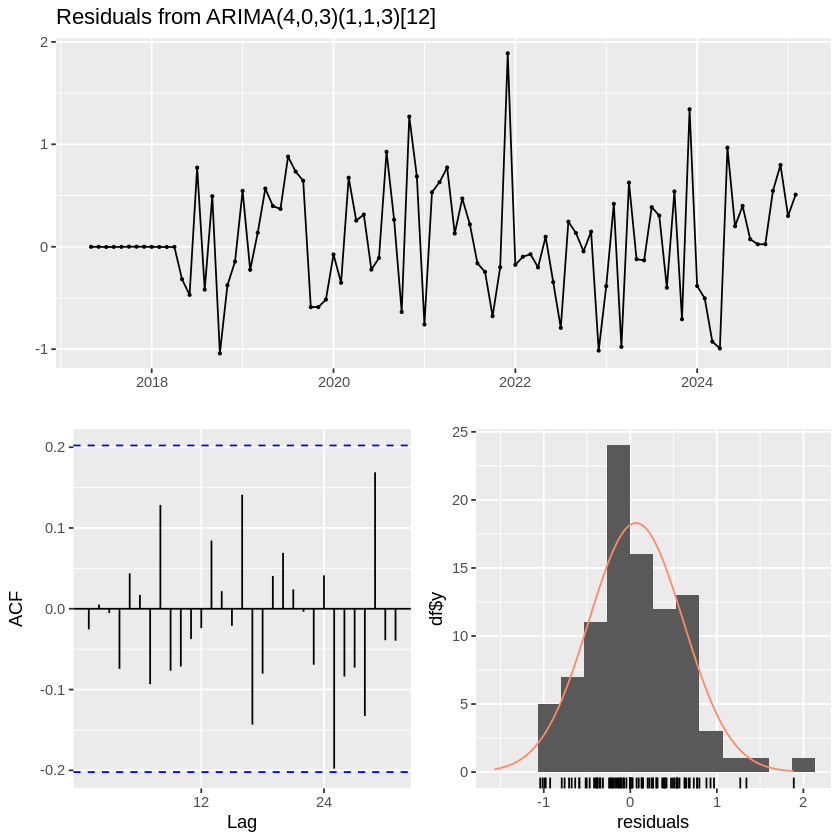

In [ ]:
checkresiduals(MH3, lag = 20)

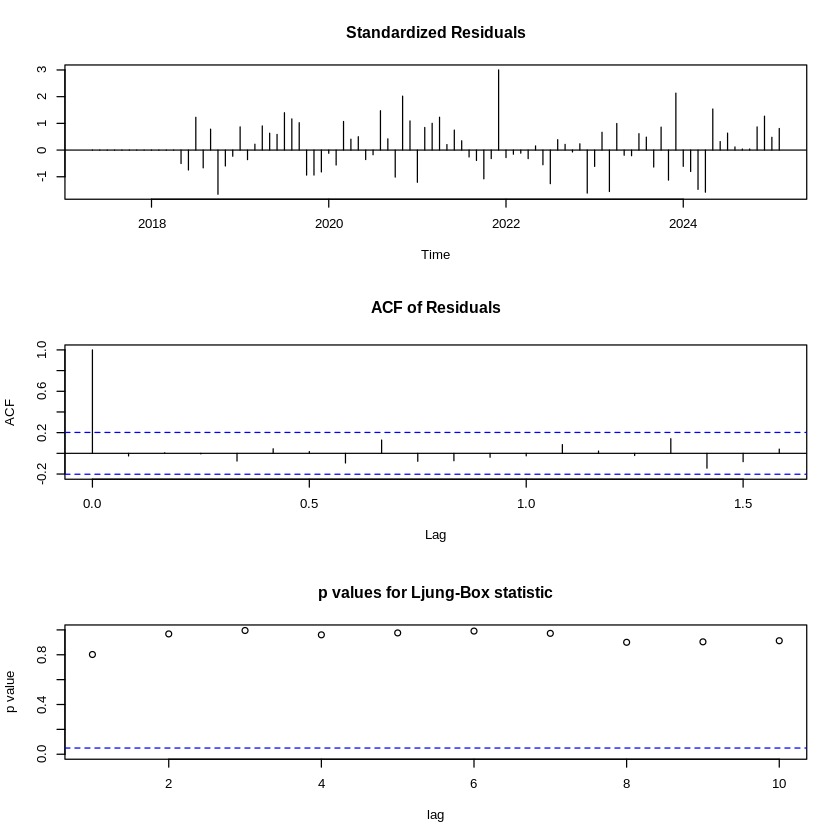

In [ ]:
tsdiag(MH3)

* Choose MH1 to forecast

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025    -0.68358842 -1.605992 0.3824297 -2.073464 0.8962556
Apr 2025    -0.39765397 -1.346012 0.6708697 -1.820584 1.1688883
May 2025    -0.33279397 -1.294790 0.7392090 -1.774195 1.2376953
Jun 2025    -0.03299584 -1.049915 1.0050036 -1.540263 1.4968613
Jul 2025    -0.18953553 -1.179875 0.8792111 -1.667689 1.3771925
Aug 2025    -0.11330497 -1.124225 0.9525631 -1.617908 1.4520279

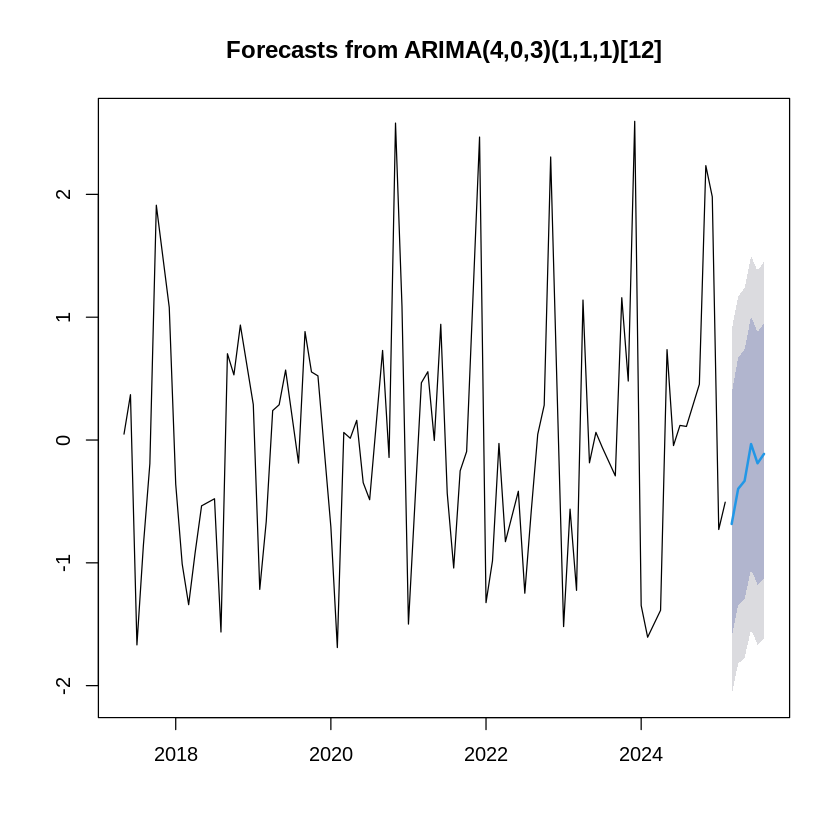

In [ ]:
pre_MH1 <- forecast(MH1, h=6)
pre_MH1
plot(pre_MH1)

## HWI

* p=1,3; d=0; q=1,3
* P=1,2; D=1; Q=1,2,3,4

In [ ]:
HW1<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(1,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
HW2<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(1,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
HW3<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(1,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)
HW4<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(1,1,4), period = 12),
  lambda ="auto", include.constant = FALSE)
HW5<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(2,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
HW6<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(2,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
HW7<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(2,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)
HW8<-Arima(HWI_TIME,order = c(1,0,1),
  seasonal = list(order = c(2,1,4), period = 12),
  lambda ="auto", include.constant = FALSE)
HW9<-Arima(HWI_TIME,order = c(1,0,3),
  seasonal = list(order = c(1,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
HW10<-Arima(HWI_TIME,order = c(1,0,3),
  seasonal = list(order = c(1,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
HW11<-Arima(HWI_TIME,order = c(1,0,3),
  seasonal = list(order = c(1,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)
HW12<-Arima(HWI_TIME,order = c(1,0,3),
  seasonal = list(order = c(1,1,4), period = 12),
  lambda ="auto", include.constant = FALSE)
#HW13<-Arima(HWI_TIME,order = c(1,0,3),
#  seasonal = list(order = c(2,1,1), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW14<-Arima(HWI_TIME,order = c(1,0,3),
#  seasonal = list(order = c(2,1,2), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW15<-Arima(HWI_TIME,order = c(1,0,3),
#  seasonal = list(order = c(2,1,3), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW16<-Arima(HWI_TIME,order = c(1,0,3),
#  seasonal = list(order = c(2,1,4), period = 12),
#  lambda ="auto", include.constant = FALSE)
HW17<-Arima(HWI_TIME,order = c(3,0,1),
  seasonal = list(order = c(1,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
HW18<-Arima(HWI_TIME,order = c(3,0,1),
  seasonal = list(order = c(1,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
HW19<-Arima(HWI_TIME,order = c(3,0,1),
  seasonal = list(order = c(1,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)
HW20<-Arima(HWI_TIME,order = c(3,0,1),
  seasonal = list(order = c(1,1,4), period = 12),
  lambda ="auto", include.constant = FALSE)
#HW21<-Arima(HWI_TIME,order = c(3,0,1),
#  seasonal = list(order = c(2,1,1), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW22<-Arima(HWI_TIME,order = c(3,0,1),
#  seasonal = list(order = c(2,1,2), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW23<-Arima(HWI_TIME,order = c(3,0,1),
#  seasonal = list(order = c(2,1,3), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW24<-Arima(HWI_TIME,order = c(3,0,1),
#  seasonal = list(order = c(2,1,4), period = 12),
#  lambda ="auto", include.constant = FALSE)
HW25<-Arima(HWI_TIME,order = c(3,0,3),
  seasonal = list(order = c(1,1,1), period = 12),
  lambda ="auto", include.constant = FALSE)
HW26<-Arima(HWI_TIME,order = c(3,0,3),
  seasonal = list(order = c(1,1,2), period = 12),
  lambda ="auto", include.constant = FALSE)
HW27<-Arima(HWI_TIME,order = c(3,0,3),
  seasonal = list(order = c(1,1,3), period = 12),
  lambda ="auto", include.constant = FALSE)
HW28<-Arima(HWI_TIME,order = c(3,0,3),
  seasonal = list(order = c(1,1,4), period = 12),
  lambda ="auto", include.constant = FALSE)
#HW29<-Arima(HWI_TIME,order = c(3,0,3),
#  seasonal = list(order = c(2,1,1), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW30<-Arima(HWI_TIME,order = c(3,0,3),
#  seasonal = list(order = c(2,1,2), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW31<-Arima(HWI_TIME,order = c(3,0,3),
#  seasonal = list(order = c(2,1,3), period = 12),
#  lambda ="auto", include.constant = FALSE)
#HW32<-Arima(HWI_TIME,order = c(3,0,3),
#  seasonal = list(order = c(2,1,4), period = 12),
#  lambda ="auto", include.constant = FALSE)

Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”
Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for str

In [ ]:
AIC(HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,HW11,HW12,HW17,HW18,HW19,HW20,HW25,HW26,HW27,HW28)
BIC(HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,HW11,HW12,HW17,HW18,HW19,HW20,HW25,HW26,HW27,HW28)

,df,AIC
,<dbl>,<dbl>
HW1,5,170.3287
HW2,6,171.5360
HW3,7,171.0658
HW4,8,172.7788
HW5,6,172.1463
HW6,7,171.9909
HW7,8,173.0185
HW8,9,174.3972
HW9,7,173.8208


,df,BIC
,<dbl>,<dbl>
HW1,5,182.3623
HW2,6,185.9763
HW3,7,187.9129
HW4,8,192.0326
HW5,6,186.5866
HW6,7,188.8380
HW7,8,192.2723
HW8,9,196.0576
HW9,7,190.6679


* AIC/BIC: HW1


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,1)[12]
Q* = 23.703, df = 16, p-value = 0.09618

Model df: 4.   Total lags used: 20



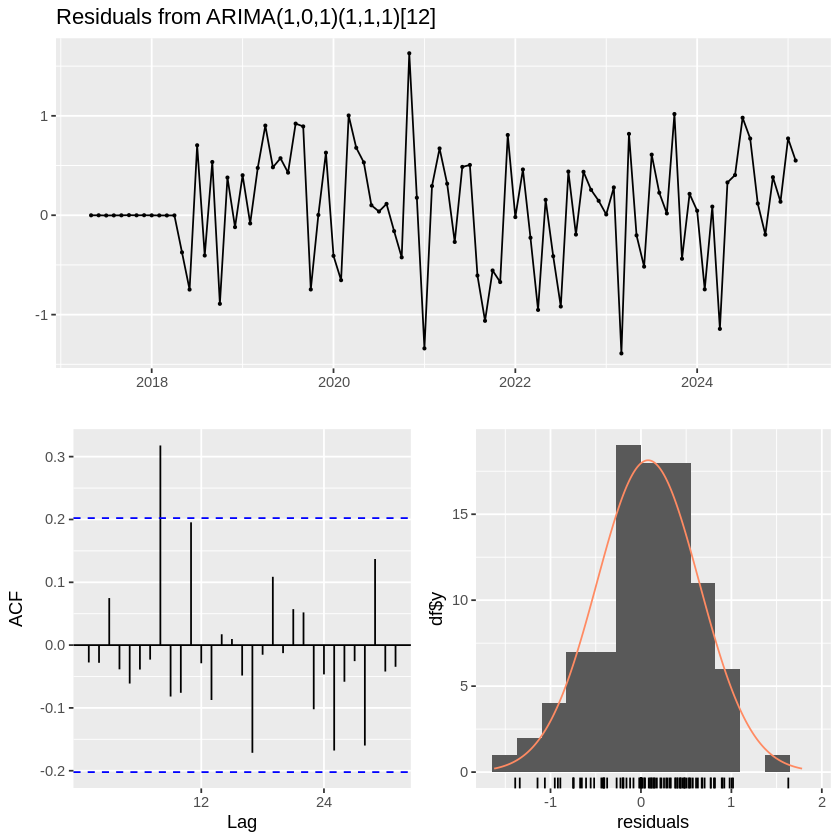

In [ ]:
checkresiduals(HW1, lag = 20)

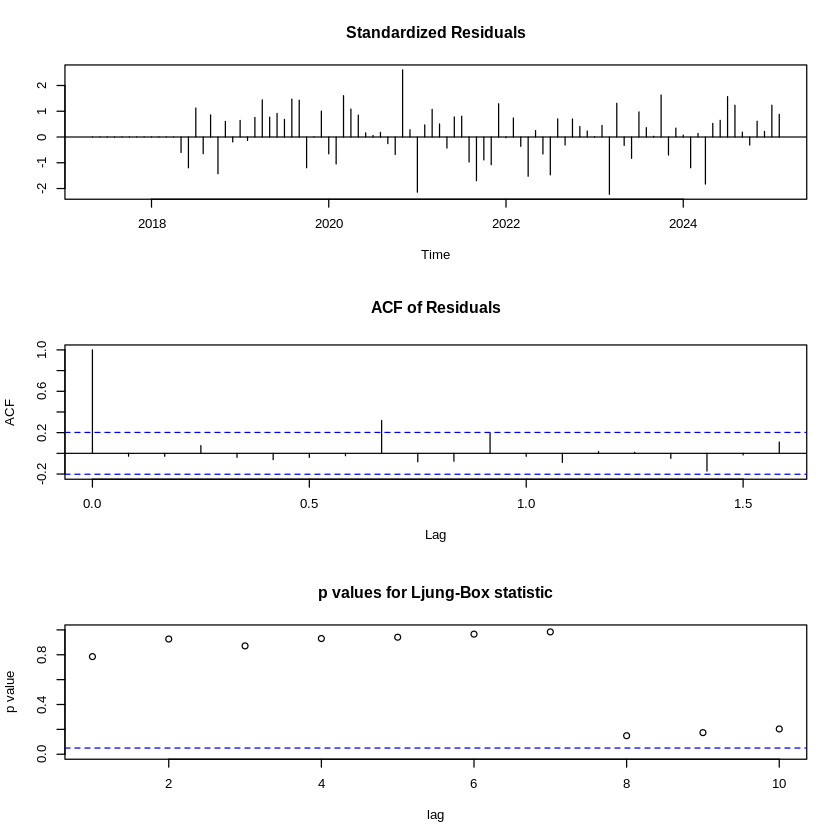

In [ ]:
tsdiag(HW1)

         Point Forecast      Lo 80      Hi 80     Lo 95     Hi 95
Mar 2025     -1.1116069 -1.9008167 -0.2963236 -2.312846 0.1710821
Apr 2025      0.3755009 -0.4969677  1.1965852 -0.932717 1.6204281
May 2025      0.1286334 -0.7350348  0.9643371 -1.165832 1.3913868
Jun 2025      0.1429611 -0.7216478  0.9775819 -1.152696 1.4044422
Jul 2025      0.2156262 -0.6528172  1.0453521 -1.085200 1.4712616
Aug 2025     -0.3650596 -1.1868616  0.5075293 -1.610948 0.9431447

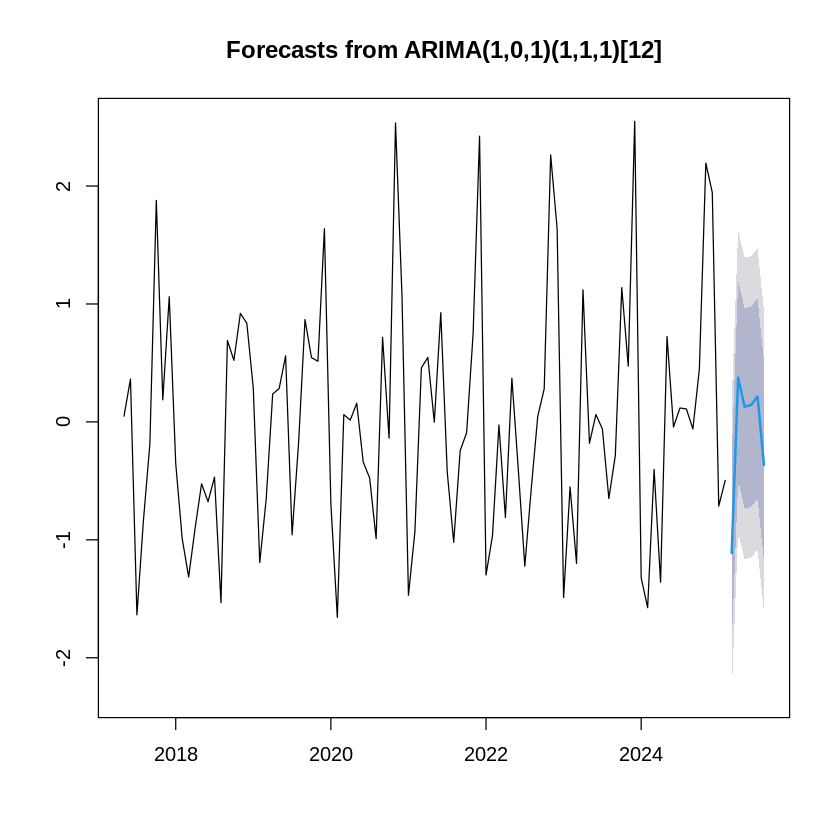

In [ ]:
pre_HW1 <- forecast(HW1, h=6)
pre_HW1
plot(pre_HW1)

# Khoi phuc ve gia tri goc

In [ ]:
# Unscale the forecasted values from MH3 (LI_TIME)
# Need the original mean and standard deviation from when LI_TIME was scaled
mean_li = attr(LI_scaled, 'scaled:center')
sd_li = attr(LI_scaled, 'scaled:scale')
forecast_li_original_scale = pre_MH1$mean * sd_li + mean_li

# Unscale the forecasted values from HW1 (HWI_TIME)
# Need the original mean and standard deviation from when HWI_TIME was scaled
mean_hwi = attr(holt_winters_imputed_scaled, 'scaled:center')
sd_hwi = attr(holt_winters_imputed_scaled, 'scaled:scale')
forecast_hwi_original_scale = pre_HW1$mean * sd_hwi + mean_hwi

# Print the unscaled forecasts
print("Unscaled Forecasts (Linear Interpolation):")
print(forecast_li_original_scale)
print("Unscaled Forecasts (Holt-Winters Based Imputation):")
print(forecast_hwi_original_scale)

[1] "Unscaled Forecasts (Linear Interpolation):"
           Mar       Apr       May       Jun       Jul       Aug
2025 143001507 151196176 153055016 161647008 157160697 159345408
[1] "Unscaled Forecasts (Holt-Winters Based Imputation):"
           Mar       Apr       May       Jun       Jul       Aug
2025 130103418 173517020 166310141 166728412 168849748 151897607


# So sanh ket qua du bao

In [ ]:
# Create a data frame to compare actual and forecast values
comparison_values_df <- data.frame(
  Datetime = seq(as.Date("2025-03-01"), by = "month", length.out = length(actual_data$Sales_VND)), # Use a date sequence starting from March 2025
  Actual_Values = as.numeric(actual_data$Sales_VND), # Convert time series to numeric vector
  Forecast_LI = as.numeric(forecast_li_original_scale), # Convert time series to numeric vector
  Forecast_HWI = as.numeric(forecast_hwi_original_scale) # Convert time series to numeric vector
)

# Print the comparison table
print("Comparison of Actual and Forecast Values (Starting March 2025):")
print(comparison_values_df)

[1] "Comparison of Actual and Forecast Values (Starting March 2025):"
    Datetime Actual_Values Forecast_LI Forecast_HWI
1 2025-03-01     145399492   143001507    130103418
2 2025-04-01     157758923   151196176    173517020
3 2025-05-01     176006666   153055016    166310141
4 2025-06-01     182082611   161647008    166728412
5 2025-07-01     205509243   157160697    168849748
6 2025-08-01     236514347   159345408    151897607


In [ ]:
# Calculate error metrics
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2, na.rm = TRUE))
}

mae <- function(actual, predicted) {
  mean(abs(actual - predicted), na.rm = TRUE)
}

mape <- function(actual, predicted) {
  mean(abs((actual - predicted) / actual), na.rm = TRUE) * 100
}

# Calculate metrics for each model
rmse_li_forecast <- rmse(comparison_values_df$Actual_Values, comparison_values_df$Forecast_LI)
mae_li_forecast <- mae(comparison_values_df$Actual_Values, comparison_values_df$Forecast_LI)
mape_li_forecast <- mape(comparison_values_df$Actual_Values, comparison_values_df$Forecast_LI)

rmse_hwi_forecast <- rmse(comparison_values_df$Actual_Values, comparison_values_df$Forecast_HWI)
mae_hwi_forecast <- mae(comparison_values_df$Actual_Values, comparison_values_df$Forecast_HWI)
mape_hwi_forecast <- mape(comparison_values_df$Actual_Values, comparison_values_df$Forecast_HWI)


# Create a data frame to compare the error metrics
error_comparison_df <- data.frame(
  Method = c("Linear Interpolation Forecast", "Holt-Winters Based Imputation Forecast"),
  RMSE = c(rmse_li_forecast, rmse_hwi_forecast),
  MAE = c(mae_li_forecast, mae_hwi_forecast),
  MAPE = c(mape_li_forecast, mape_hwi_forecast)
)

# Print the comparison table
print("Comparison of Forecast Error Metrics:")
print(error_comparison_df)

[1] "Comparison of Forecast Error Metrics:"
                                  Method     RMSE      MAE     MAPE
1          Linear Interpolation Forecast 39340054 29644245 14.37108
2 Holt-Winters Based Imputation Forecast 39403834 29563522 14.67757


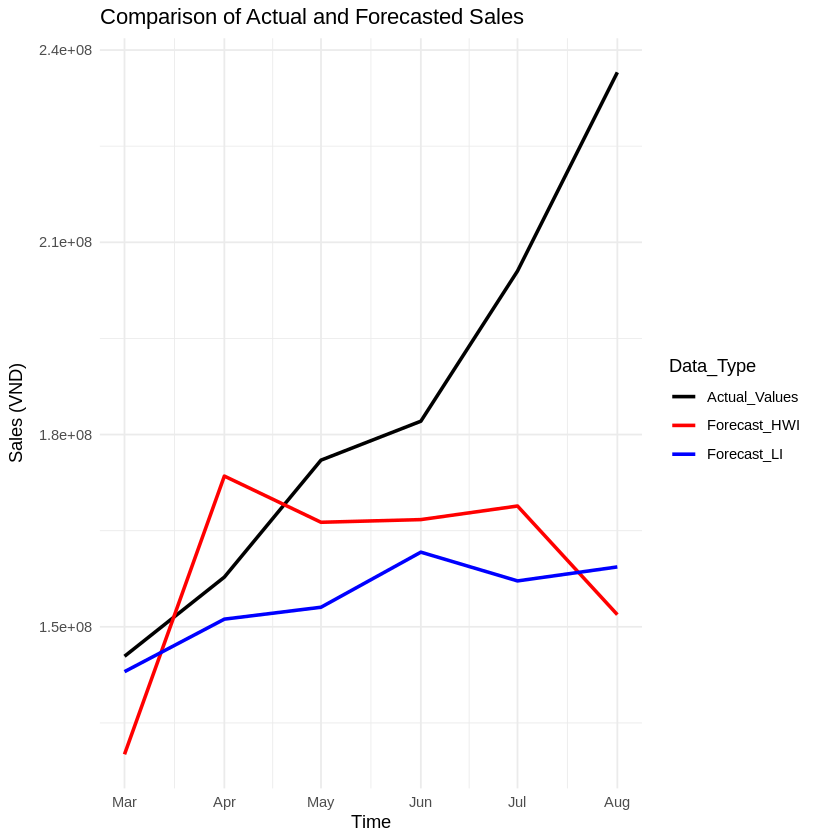

In [ ]:
library(ggplot2)
library(tidyr) # Load tidyr for pivot_longer

# Reshape the data for plotting
comparison_values_long <- pivot_longer(comparison_values_df,
                                       cols = c(Actual_Values, Forecast_LI, Forecast_HWI),
                                       names_to = "Data_Type",
                                       values_to = "Sales_VND")

# Create the plot
ggplot(comparison_values_long, aes(x = Datetime, y = Sales_VND, color = Data_Type)) +
  geom_line(lwd = 1) +
  labs(title = "Comparison of Actual and Forecasted Sales",
       x = "Time",
       y = "Sales (VND)") +
  scale_color_manual(values = c("Actual_Values" = "black",
                                 "Forecast_LI" = "blue",
                                 "Forecast_HWI" = "red")) +
  theme_minimal()

* CHOOSE LI

# XG BOOST

In [ ]:
# Lấy phần dư (residuals) trên dữ liệu huấn luyện
re_sarima <- residuals(MH1)
re_sarima

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,-8.855554e-04,-6.086359e-04,-2.523589e-03,-1.696691e-03,-1.073338e-03,9.407617e-04,5.049918e-04,7.983424e-05
2018,-1.221550e-03,-1.848087e-03,-2.184445e-03,-1.758285e-03,-3.678250e-01,-5.571353e-01,8.946108e-01,-4.605364e-01,4.835923e-01,-1.136021e+00,-4.243196e-01,-2.003611e-01
2019,6.221497e-01,-2.031261e-01,1.756788e-01,6.363209e-01,4.870293e-01,5.846134e-01,1.094242e+00,7.999743e-01,3.852147e-01,-7.399487e-01,-5.534875e-01,-4.856662e-01
2020,-2.928443e-01,-6.260711e-01,5.867573e-01,2.326249e-01,2.341869e-01,-2.937399e-01,2.299900e-01,9.684983e-01,2.068393e-01,-1.140482e+00,1.390916e+00,8.154504e-01
2021,-9.592397e-01,4.375723e-01,8.661391e-01,7.448564e-01,-3.203707e-02,6.711731e-01,9.644267e-02,-3.692976e-01,-7.368173e-01,-5.881712e-01,-4.326080e-02,1.960089e+00
2022,-6.205888e-01,-2.750049e-01,-4.109871e-02,-4.174173e-01,-2.228173e-01,-4.076082e-01,-9.071458e-01,-2.614568e-01,-3.494422e-01,1.098705e-01,1.052081e+00,-6.534470e-01
2023,-9.790704e-01,1.918018e-01,-7.012541e-01,1.435429e+00,1.280331e-01,-4.426243e-01,1.633660e-02,5.019877e-01,-3.587752e-02,1.040176e+00,-1.161379e+00,1.039471e+00
2024,-3.323278e-01,-5.516530e-01,-9.643936e-01,-1.172080e+00,8.704078e-01,-4.247073e-03,3.981693e-01,2.686725e-01,1.202951e-01,1.178633e-01,9.902536e-01,7.213588e-01
2025,2.669733e-01,1.529990e-01,,,,,,,,,,


In [ ]:
# Dữ liệu huấn luyện cho XGBoost: sử dụng phần dư từ SARIMA
df <- data.table(residual = as.numeric(re_sarima))

In [ ]:
# Tạo lag features (đặc trưng từ các giá trị quá khứ)
df[, `:=`(
 lag1 = shift(residual, 1),
 lag2 = shift(residual, 2),
 lag3 = shift(residual, 3)
)]
df <- na.omit(df)

In [ ]:
# Dữ liệu XGBoost

train_matrix <- as.matrix(df[, .(lag1, lag2, lag3)])
train_label <- df$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)

In [ ]:
# Huấn luyện mô hình XGBoost
params <- list(objective = "reg:squarederror", max_depth = 3, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 100)
residual_forecast <- c()
lag_vals <- tail(re_sarima, 3)
for (i in 1:6) { # Changed loop to 6 iterations to match SARIMA forecast length
 input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)],
 nrow = 1)
 colnames(input_matrix) <- c("lag1", "lag2", "lag3")
 pred <- predict(xgb_model, input_matrix)

 residual_forecast <- c(residual_forecast, pred)
 lag_vals <- c(lag_vals, pred)
}

In [ ]:
# SARIMA dự báo
sarima_pred <- as.numeric(pre_MH1$mean)
print(sarima_pred)

# Tổng hợp dự báo cuối cùng = SARIMA + XGBoost residual
hybrid_forecast <- sarima_pred + residual_forecast

[1] -0.68358842 -0.39765397 -0.33279397 -0.03299584 -0.18953553 -0.11330497


In [ ]:
# In kết quả
print(data.frame(
  Month = seq(as.Date("2025-03-01"), by = "month", length.out = 6),
  SARIMA = as.numeric(sarima_pred), # Ensure sarima_pred is treated as numeric
  Residual = as.numeric(residual_forecast[1:6]), # Take the first 6 elements
  Hybrid = as.numeric(hybrid_forecast[1:6]) # Take the first 6 elements
))

       Month      SARIMA  Residual      Hybrid
1 2025-03-01 -0.68358842 0.4177373 -0.26585114
2 2025-04-01 -0.39765397 0.4204612  0.02280727
3 2025-05-01 -0.33279397 0.2014211 -0.13137290
4 2025-06-01 -0.03299584 0.4345853  0.40158949
5 2025-07-01 -0.18953553 0.4668179  0.27728242
6 2025-08-01 -0.11330497 0.2532272  0.13992220


In [ ]:
# Unscale the hybrid forecast
# Need the original mean and standard deviation from when HWI_TIME was scaled
mean_li = attr(LI_scaled, 'scaled:center')
sd_li = attr(LI_scaled, 'scaled:scale')
hybrid_forecast_original_scale = hybrid_forecast * sd_li + mean_li

# Print the unscaled hybrid forecast
print("Unscaled Hybrid Forecast:")
print(hybrid_forecast_original_scale)

[1] "Unscaled Hybrid Forecast:"
[1] 154973548 163246284 158827594 174101902 170539353 166602711


In [ ]:
# Calculate metrics for the hybrid forecast

# Ensure the hybrid forecast has the same length as the actual data for comparison
# Since the forecast is for 6 periods, we will compare it with the last 6 actual values
actual_for_hybrid_comparison <- tail(as.numeric(actual_data$Sales_VND), 6)

rmse_hybrid_forecast <- rmse(actual_for_hybrid_comparison, hybrid_forecast_original_scale)
mae_hybrid_forecast <- mae(actual_for_hybrid_comparison, hybrid_forecast_original_scale)
mape_hybrid_forecast <- mape(actual_for_hybrid_comparison, hybrid_forecast_original_scale)

# Create a data frame to compare the error metrics, including the hybrid model
error_comparison_df_hybrid <- data.frame(
  Method = c("Linear Interpolation Forecast", "Holt-Winters Based Imputation Forecast", "Hybrid Forecast (SARIMA LI + XGBoost)"),
  RMSE = c(rmse_li_forecast, rmse_hwi_forecast, rmse_hybrid_forecast),
  MAE = c(mae_li_forecast, mae_hwi_forecast, mae_hybrid_forecast),
  MAPE = c(mape_li_forecast, mape_hwi_forecast, mape_hybrid_forecast)
)

# Print the comparison table
print("Comparison of Forecast Error Metrics (Including Hybrid Model):")
print(error_comparison_df_hybrid)

[1] "Comparison of Forecast Error Metrics (Including Hybrid Model):"
                                  Method     RMSE      MAE     MAPE
1          Linear Interpolation Forecast 39340054 29644245 14.37108
2 Holt-Winters Based Imputation Forecast 39403834 29563522 14.67757
3  Hybrid Forecast (SARIMA LI + XGBoost) 33143918 24183787 11.79697


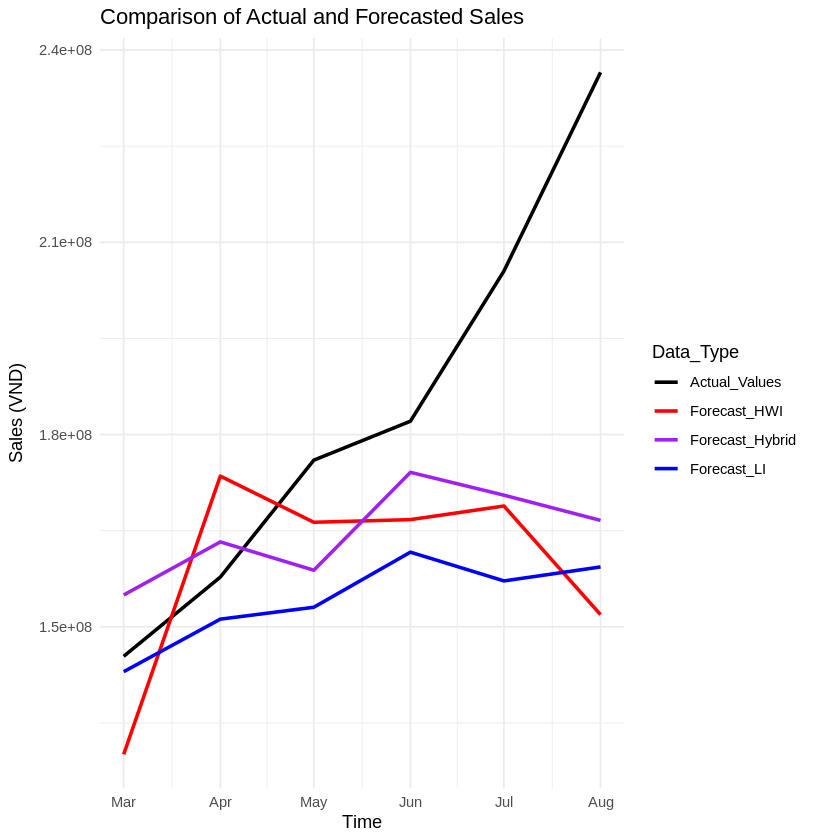

In [ ]:
library(ggplot2)
library(tidyr) # Load tidyr for pivot_longer

# Combine all forecast values into a data frame
all_forecasts_df <- data.frame(
  Datetime = seq(as.Date("2025-03-01"), by = "month", length.out = length(actual_data$Sales_VND)),
  Actual_Values = as.numeric(actual_data$Sales_VND),
  Forecast_LI = as.numeric(forecast_li_original_scale),
  Forecast_HWI = as.numeric(forecast_hwi_original_scale),
  Forecast_Hybrid = as.numeric(hybrid_forecast_original_scale[1:length(actual_data$Sales_VND)]) # Include hybrid forecast and truncate
)

# Reshape the data for plotting
all_forecasts_long <- pivot_longer(all_forecasts_df,
                                       cols = c(Actual_Values, Forecast_LI, Forecast_HWI, Forecast_Hybrid), # Include hybrid forecast
                                       names_to = "Data_Type",
                                       values_to = "Sales_VND")

# Create the plot
ggplot(all_forecasts_long, aes(x = Datetime, y = Sales_VND, color = Data_Type)) +
  geom_line(lwd = 1) +
  labs(title = "Comparison of Actual and Forecasted Sales",
       x = "Time",
       y = "Sales (VND)") +
  scale_color_manual(values = c("Actual_Values" = "black",
                                 "Forecast_LI" = "blue",
                                 "Forecast_HWI" = "red",
                                 "Forecast_Hybrid" = "purple")) + # Add color for hybrid forecast
  theme_minimal()

# FORECAST NEXT 12 MONTHS

         Point Forecast      Lo 80      Hi 80      Lo 95     Hi 95
Mar 2025    -0.68358842 -1.6059923 0.38242969 -2.0734640 0.8962556
Apr 2025    -0.39765397 -1.3460116 0.67086973 -1.8205845 1.1688883
May 2025    -0.33279397 -1.2947895 0.73920897 -1.7741954 1.2376953
Jun 2025    -0.03299584 -1.0499150 1.00500360 -1.5402628 1.4968613
Jul 2025    -0.18953553 -1.1798752 0.87921108 -1.6676888 1.3771925
Aug 2025    -0.11330497 -1.1242250 0.95256312 -1.6179085 1.4520279
Sep 2025     0.16571839 -0.9102737 1.16983367 -1.4123615 1.6631581
Oct 2025     0.42434711 -0.6750023 1.39793487 -1.1877921 1.8855470
Nov 2025     1.33766656  0.3513174 2.25706639 -0.2651775 2.7296597
Dec 2025     1.64313761  0.6854844 2.55113994  0.1267749 3.0197616
Jan 2026    -1.01389375 -1.9513942 0.05032969 -2.4304221 0.6219464
Feb 2026    -0.85414984 -1.8041990 0.24324974 -2.2877292 0.7907681

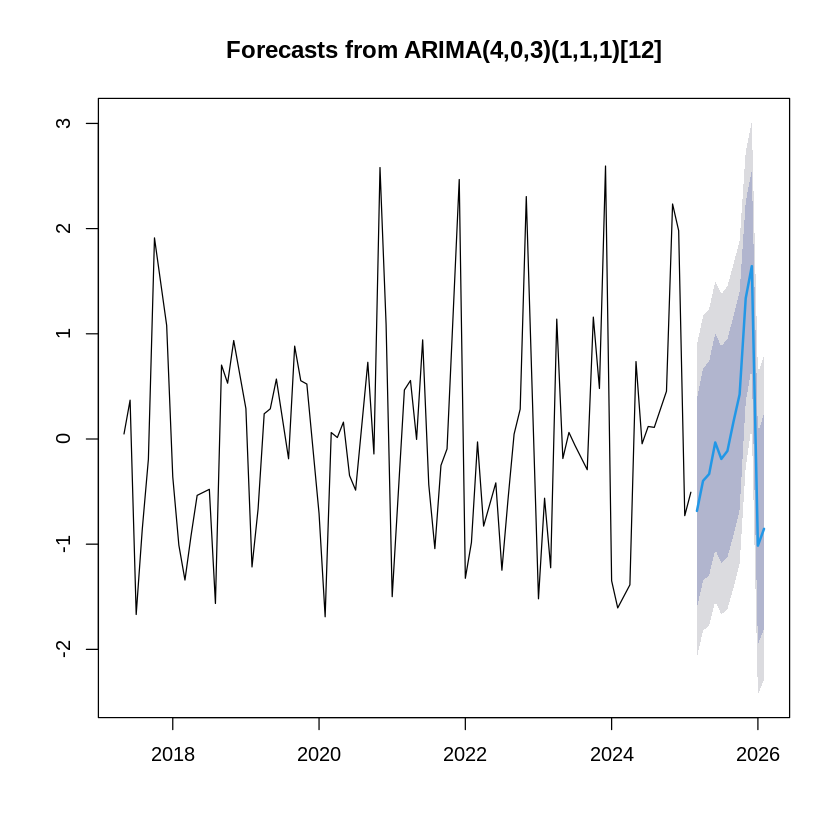

In [ ]:
pre_MH1 <- forecast(MH1, h=12)
pre_MH1
plot(pre_MH1)

## XG BOOST

In [ ]:
# Lấy phần dư (residuals) trên dữ liệu huấn luyện
re_sarima <- residuals(MH1)
re_sarima

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2017,,,,,-8.855554e-04,-6.086359e-04,-2.523589e-03,-1.696691e-03,-1.073338e-03,9.407617e-04,5.049918e-04,7.983424e-05
2018,-1.221550e-03,-1.848087e-03,-2.184445e-03,-1.758285e-03,-3.678250e-01,-5.571353e-01,8.946108e-01,-4.605364e-01,4.835923e-01,-1.136021e+00,-4.243196e-01,-2.003611e-01
2019,6.221497e-01,-2.031261e-01,1.756788e-01,6.363209e-01,4.870293e-01,5.846134e-01,1.094242e+00,7.999743e-01,3.852147e-01,-7.399487e-01,-5.534875e-01,-4.856662e-01
2020,-2.928443e-01,-6.260711e-01,5.867573e-01,2.326249e-01,2.341869e-01,-2.937399e-01,2.299900e-01,9.684983e-01,2.068393e-01,-1.140482e+00,1.390916e+00,8.154504e-01
2021,-9.592397e-01,4.375723e-01,8.661391e-01,7.448564e-01,-3.203707e-02,6.711731e-01,9.644267e-02,-3.692976e-01,-7.368173e-01,-5.881712e-01,-4.326080e-02,1.960089e+00
2022,-6.205888e-01,-2.750049e-01,-4.109871e-02,-4.174173e-01,-2.228173e-01,-4.076082e-01,-9.071458e-01,-2.614568e-01,-3.494422e-01,1.098705e-01,1.052081e+00,-6.534470e-01
2023,-9.790704e-01,1.918018e-01,-7.012541e-01,1.435429e+00,1.280331e-01,-4.426243e-01,1.633660e-02,5.019877e-01,-3.587752e-02,1.040176e+00,-1.161379e+00,1.039471e+00
2024,-3.323278e-01,-5.516530e-01,-9.643936e-01,-1.172080e+00,8.704078e-01,-4.247073e-03,3.981693e-01,2.686725e-01,1.202951e-01,1.178633e-01,9.902536e-01,7.213588e-01
2025,2.669733e-01,1.529990e-01,,,,,,,,,,


In [ ]:
# Dữ liệu huấn luyện cho XGBoost: sử dụng phần dư từ SARIMA
df <- data.table(residual = as.numeric(re_sarima))

In [ ]:
# Tạo lag features (đặc trưng từ các giá trị quá khứ)
df[, `:=`(
 lag1 = shift(residual, 1),
 lag2 = shift(residual, 2),
 lag3 = shift(residual, 3)
)]
df <- na.omit(df)

In [ ]:
# Dữ liệu XGBoost

train_matrix <- as.matrix(df[, .(lag1, lag2, lag3)])
train_label <- df$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)

In [ ]:
# Huấn luyện mô hình XGBoost
params <- list(objective = "reg:squarederror", max_depth = 3, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 100)
residual_forecast <- c()
lag_vals <- tail(re_sarima, 3)
for (i in 1:6) { # Changed loop to 6 iterations to match SARIMA forecast length
 input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)],
 nrow = 1)
 colnames(input_matrix) <- c("lag1", "lag2", "lag3")
 pred <- predict(xgb_model, input_matrix)

 residual_forecast <- c(residual_forecast, pred)
 lag_vals <- c(lag_vals, pred)
}

In [ ]:
# SARIMA dự báo
sarima_pred <- as.numeric(pre_MH1$mean)
print(sarima_pred)

# Tổng hợp dự báo cuối cùng = SARIMA + XGBoost residual
hybrid_forecast <- sarima_pred + residual_forecast

 [1] -0.68358842 -0.39765397 -0.33279397 -0.03299584 -0.18953553 -0.11330497
 [7]  0.16571839  0.42434711  1.33766656  1.64313761 -1.01389375 -0.85414984


In [ ]:
# In kết quả
print(data.frame(
  Month = seq(as.Date("2025-03-01"), by = "month", length.out = 12),
  SARIMA = as.numeric(sarima_pred), # Ensure sarima_pred is treated as numeric
  Residual = as.numeric(residual_forecast[1:12]), # Take the first 6 elements
  Hybrid = as.numeric(hybrid_forecast[1:12]) # Take the first 6 elements
))

        Month      SARIMA  Residual      Hybrid
1  2025-03-01 -0.68358842 0.4177373 -0.26585114
2  2025-04-01 -0.39765397 0.4204612  0.02280727
3  2025-05-01 -0.33279397 0.2014211 -0.13137290
4  2025-06-01 -0.03299584 0.4345853  0.40158949
5  2025-07-01 -0.18953553 0.4668179  0.27728242
6  2025-08-01 -0.11330497 0.2532272  0.13992220
7  2025-09-01  0.16571839        NA  0.58345566
8  2025-10-01  0.42434711        NA  0.84480835
9  2025-11-01  1.33766656        NA  1.53908763
10 2025-12-01  1.64313761        NA  2.07772294
11 2026-01-01 -1.01389375        NA -0.54707580
12 2026-02-01 -0.85414984        NA -0.60092266


In [ ]:
# Unscale the hybrid forecast
# Need the original mean and standard deviation from when HWI_TIME was scaled
mean_li = attr(LI_scaled, 'scaled:center')
sd_li = attr(LI_scaled, 'scaled:scale')
hybrid_forecast_original_scale = hybrid_forecast * sd_li + mean_li

# Print the unscaled hybrid forecast
print("Unscaled Hybrid Forecast:")
print(hybrid_forecast_original_scale)

[1] "Unscaled Hybrid Forecast:"
 [1] 154973548 163246284 158827594 174101902 170539353 166602711 179314051
 [8] 186804226 206701755 222138644 146913857 145370646


        Month    Hybrid
1  2025-03-01 154973548
2  2025-04-01 163246284
3  2025-05-01 158827594
4  2025-06-01 174101902
5  2025-07-01 170539353
6  2025-08-01 166602711
7  2025-09-01 179314051
8  2025-10-01 186804226
9  2025-11-01 206701755
10 2025-12-01 222138644
11 2026-01-01 146913857
12 2026-02-01 145370646


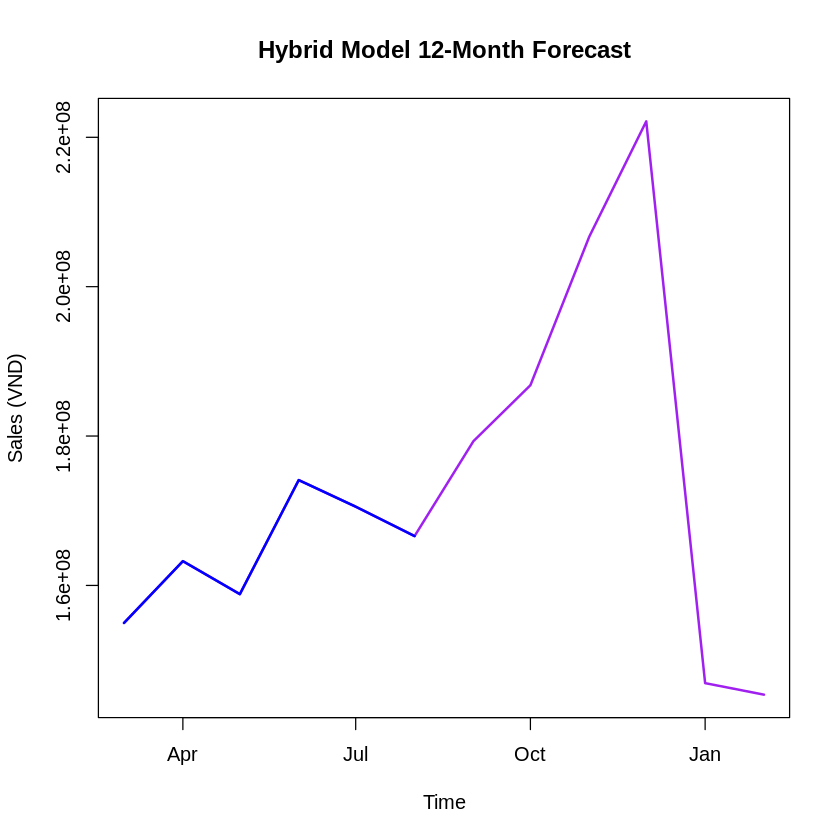

In [ ]:
print(data.frame(
  Month = seq(as.Date("2025-03-01"), by = "month", length.out = 12),
  Hybrid = as.numeric(hybrid_forecast_original_scale)
))
# Plot the unscaled hybrid forecast for the next 12 months
plot(seq(as.Date("2025-03-01"), by = "month", length.out = 12), # Use Month for x-axis
     as.numeric(hybrid_forecast_original_scale), # Use hybrid_forecast_original_scale for y-axis
     main = "Hybrid Model 12-Month Forecast",
     ylab = "Sales (VND)",
     xlab = "Time",
     col = "purple", # Using purple as used in the comparison plot
     lwd = 2,
     type = "l") # Specify line plot

# Add the hybrid forecast line for the next 6 months in blue
lines(seq(as.Date("2025-03-01"), by = "month", length.out = 6),
      as.numeric(hybrid_forecast_original_scale[1:6]), # Select the first 6 values
      col = "blue",
      lwd = 2)